# **PART A: Energy Consumption Forecasting**

---

## **Project Objective**

### **Tasks:**

> **1. Prediction Task:**  
> Write the code to solve the prediction task. Use the **Statsmodels** library to build the forecasting models. *Note: Do not use other third-party libraries such as autoML*.

> **2. Hyperparameter Tuning:**  
> Tune the hyperparameters of the time series model to maximize accuracy for both **training** and **testing** data predictions.

> **3. Report Writing:**  
> Write a short report detailing your implementation, experiments, and analysis in the Jupyter notebook, including Python code and comments.

> **4. Presentation Slides:**  
> Create a set of slides summarizing your Jupyter notebook report. Explain the entire machine learning process: data exploration, data cleaning, feature engineering, model building, evaluation, and model improvement. Write your conclusions. *Slides should not exceed 20 pages*.

---

## **Background**

> Using the **Energy Consumption Dataset**, the task is to train time series models and forecast the consumption of **gas**, **electricity**, and **water** for the next **60 months**.


# **Phases**

> The project is divided into the following 9 phases:

> 1. **Data Preparation**  
> - In this phase, the dataset is acquired and cleaned. Missing values are handled, and outliers are addressed. Feature engineering is performed to transform the data into a suitable format for time series forecasting.

> 2. **Exploratory Data Analysis (EDA)**  
> - EDA involves visualizing the data to understand underlying trends, seasonality, and potential anomalies. This phase also includes checking for stationarity, which is crucial for accurate time series modeling.

> 3. **Stationarity Testing**  
> - Since most time series models require stationary data, this phase tests for stationarity.

> 4. **Time Series Forecasting Models**  
> - This phase focuses on selecting appropriate forecasting models, including SARIMAX and HWES, to predict energy consumption. Each model is tailored to the specific characteristics of electricity, gas, and water consumption data.

> 5. **Model Development for Forecasting**  
> - The selected models are developed and trained using historical data. This phase includes configuring model parameters and ensuring that the models can effectively capture trends, seasonality, and irregular patterns.

> 6. **Model Evaluation**  
> - After model development, performance is evaluated using key metrics such as MAPE, RMSE, MAE, and R². This phase ensures that the models are accurate, reliable, and suitable for forecasting future energy consumption.

> 7. **Residual Diagnostics and Model Validation**  
> - Residual analysis is conducted to validate model assumptions, including white noise behavior, normality of errors, and constant variance. This step ensures model robustness and identifies any areas for further refinement.

> 8. **Forecasting Future Energy Consumption**  
> - Using the validated models, long-term forecasts (for 60 months) are generated for electricity, gas, and water consumption. The results are visualized alongside historical data to highlight projected trends and seasonal patterns.

> 9. **Final Conclusion**  
> - The project concludes with a summary of key findings, insights from the forecasting models, and recommendations for future work. This phase highlights the effectiveness of the applied models and suggests potential areas for improvement in energy consumption forecasting.


# **Importing Necessary Libraries** 📚

Before diving into the analysis, we'll import the necessary libraries for **data manipulation**, **visualization**, **modeling**, and **evaluation**.

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Itertools
import itertools

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# ACF and PACF Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationarity Testing
from statsmodels.tsa.stattools import adfuller

# Statmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox


# Performance Metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score



# Warning Suppression
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# Suppress specific warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter('ignore', ValueWarning)


# **<u>Phase 1: Data Preparation</u>**

> In this phase, we'll cover the following key processes to ensure our dataset is clean, consistent, and ready for modeling:

### **📥 Data Acquisition and Initial Inspection**
- Loading the dataset and performing an initial overview to understand its structure.
- Checking for missing values, data types, and basic statistical summaries.

### **🧹 Data Cleaning**
- **Handling Missing Values:** Identifying and addressing any gaps in the data to prevent issues during model training.
- **Outlier Detection and Treatment:** Using statistical methods (e.g., IQR) to detect and cap outliers, ensuring data consistency.

### **Data Resampling for Consistency**
- Ensuring the time series data is uniformly spaced for accurate time-dependent analysis.
- Adjusting the frequency if necessary to maintain data integrity.

### **Advanced Feature Engineering**
- **Lag Features:** Capturing temporal dependencies by incorporating past data points.
- **Rolling Statistics:** Smoothing data to highlight trends and reduce noise.
- **Date-Based Features:** Extracting time-related attributes (month, quarter, year) to capture seasonal effects.
- **Interaction Features:** Combining variables to uncover hidden patterns and improve model performance.

> **Outcome:**  
> By the end of this phase, the dataset will be thoroughly cleaned, enriched with new features, and fully prepared for time series forecasting models.


In [2]:
# Load the dataset
data = pd.read_csv('CA2-Energy-Consumption-Data.csv')

# Convert DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], dayfirst=True)

# Set DATE as the index for time series analysis
data.set_index('DATE', inplace=True)

# Display the first few rows and basic information
print("Dataset Overview:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Display summary statistics
data.describe()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1990-01-01 to 2023-01-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gas Consumption (tons)         397 non-null    float64
 1   Electricity Consumption (MWh)  397 non-null    float64
 2   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3)
memory usage: 12.4 KB
None

Missing Values:
Gas Consumption (tons)           0
Electricity Consumption (MWh)    0
Water Consumption (tons)         0
dtype: int64


,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
count,397.000000,397.000000,397.000000
mean,23.785139,888.472544,484.953652
std,4.903452,153.877594,133.908863
min,11.600000,553.200000,44.400000
25%,20.200000,771.100000,384.400000
50%,23.500000,897.800000,487.400000
75%,27.900000,1005.200000,580.200000
max,46.000000,1294.000000,811.000000


### **Explanation**

> Here's why each preprocessing phase is essential for time series forecasting:

#### **Datetime Conversion**
- Converts date columns into a proper datetime format.
- Ensures that time series operations such as **resampling**, **rolling statistics**, and **lag features** function effectively.

#### **Setting Index**
- Time series models like **SARIMAX** require the **date** to be set as the index to capture **temporal dependencies**.
- Facilitates easy slicing, resampling, and time-based computations.

#### **Missing Value Check**
- Identifies any **gaps** in the data that could negatively impact model performance.
- Early detection allows for appropriate handling, such as **imputation** or **removal** of missing values.

#### **Summary Statistics**
- Provides key insights into data distribution (mean, median, standard deviation, etc.).
- Helps in detecting potential **outliers**, **anomalies**, and understanding overall data behavior.

## **<u>1.2 Data Cleaning</u>**

> In this phase, we'll focus on **outlier detection and treatment**, as the dataset has **no missing values**.

### **Outlier Detection and Treatment**

Since missing values are not an issue, we'll proceed with identifying and handling outliers to improve data quality and model performance.

#### **Outlier Detection Method: Interquartile Range (IQR)**
- The **IQR method** is used to detect extreme values that fall outside the typical data range.
- **Formula:**
  - **IQR = Q3 - Q1**
  - **Lower Bound = Q1 - 1.5 × IQR**
  - **Upper Bound = Q3 + 1.5 × IQR**
- Any data points outside these bounds are considered outliers.

#### **Outlier Treatment: Capping Method**
- Instead of removing outliers, we'll **cap** them at the upper and lower bounds to retain data integrity.
- This approach prevents data loss while reducing the impact of extreme values on model performance.

> By handling outliers effectively, we ensure that the data is clean, consistent, and suitable for accurate time series forecasting.


We'll use the Interquartile Range (IQR) method to detect and cap outliers.

In [3]:
# Function to detect and cap outliers using the IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply outlier treatment for each energy type
for column in data.columns:
    data[column] = cap_outliers(data[column])

# Display updated summary statistics
data.describe()


,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
count,397.000000,397.000000,397.000000
mean,23.768640,888.472544,485.070277
std,4.839114,153.877594,133.543869
min,11.600000,553.200000,90.700000
25%,20.200000,771.100000,384.400000
50%,23.500000,897.800000,487.400000
75%,27.900000,1005.200000,580.200000
max,39.450000,1294.000000,811.000000


## **<u>1.3 Feature Engineering</u>**

> In this phase, we'll focus on creating relevant features to enhance the forecasting model's ability to capture trends, seasonality, and fluctuations.

### **Feature Engineering: Lag and Rolling Statistics**

Since our data is clean and has no missing values, we will create the following features to capture time-dependence in the data:

#### **Lag Features**
- **Lag 1 Feature:**  
  The **lag 1** feature will capture the previous period's consumption. This helps the model account for short-term dependencies in the data.
  - **Formula:** `lag_1 = data[t-1]`

#### **Rolling Statistics (3-period)**
- **Rolling Mean:**  
  The **3-period rolling mean** will help smooth short-term fluctuations and highlight longer-term trends.
  - **Formula:** `rolling_mean_3 = data[t-3:t].mean()`

#### **📆 Date-Based Features**
- **Month, Quarter, and Year:**  
  These features will allow the model to account for any seasonal patterns in the data (monthly, quarterly, or yearly).
  - **Month:** Extracts the month from the date index.
  - **Quarter:** Extracts the quarter (1 to 4) from the date index.
  - **Year:** Extracts the year from the date index.

### **Feature Engineering for Each Energy Type**

We will create these features for each energy type (Electricity, Gas, Water) in the dataset:

- **Electricity Features:**
  - Lag 1
  - Rolling Mean (3 periods)
  - Month, Quarter, Year

- **Gas Features:**
  - Lag 1
  - Rolling Mean (3 periods)
  - Month, Quarter, Year

- **Water Features:**
  - Lag 1
  - Rolling Mean (3 periods)
  - Month, Quarter, Year

> By adding these features, we ensure the dataset captures not only historical trends but also seasonality and cyclical patterns, improving the model's predictive power.


In [4]:
# 1. Lag Features (for Electricity Consumption)
data['Electricity_Lag_1'] = data['Electricity Consumption (MWh)'].shift(1)

# 2. Rolling Statistics for Electricity Consumption
data['Electricity_Rolling_Mean_3'] = data['Electricity Consumption (MWh)'].rolling(window=3).mean()

# 3. Date-Based Features for Electricity
data['Electricity_Month'] = data.index.month
data['Electricity_Quarter'] = data.index.quarter
data['Electricity_Year'] = data.index.year

# 4. Lag Features (for Gas Consumption)
data['Gas_Lag_1'] = data['Gas Consumption (tons)'].shift(1)

# 5. Rolling Statistics for Gas Consumption
data['Gas_Rolling_Mean_3'] = data['Gas Consumption (tons)'].rolling(window=3).mean()

# 6. Date-Based Features for Gas
data['Gas_Month'] = data.index.month
data['Gas_Quarter'] = data.index.quarter
data['Gas_Year'] = data.index.year

# 7. Lag Features (for Water Consumption)
data['Water_Lag_1'] = data['Water Consumption (tons)'].shift(1)

# 8. Rolling Statistics for Water Consumption
data['Water_Rolling_Mean_3'] = data['Water Consumption (tons)'].rolling(window=3).mean()

# 9. Date-Based Features for Water
data['Water_Month'] = data.index.month
data['Water_Quarter'] = data.index.quarter
data['Water_Year'] = data.index.year

# Handle Missing Values due to Lag/Rolling Features (Drop the rows with NaN values)
data.dropna(inplace=True)



# **<u>Phase 2: Exploratory Data Analysis (EDA)</u>**

> In this phase, we'll **explore the dataset** to uncover **trends**, **patterns**, and any potential issues that could affect model performance.

### **EDA Workflow**

1. **Trend & Seasonality Visualization**  
   - Visualize energy consumption over time to identify **long-term trends**, **seasonal patterns**, and **anomalies**.

2. **🗓️ Seasonal Decomposition**  
   - Break down the time series into its **Trend**, **Seasonality**, and **Residual** components to understand the underlying structure.

3. **🔗 Correlation Analysis (ACF & PACF)**  
   - Use **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** to detect **temporal dependencies** and determine the **order of ARIMA/SARIMAX models**.


## **<u>2.1 Trend & Seasonality Visualization</u>**

> In this section, we'll **visualize the time series data** to identify key patterns such as **long-term trends**, **seasonality**, and potential **anomalies**.

### **Why Visualize Trends & Seasonality?**
- **Trends:** Show the **overall direction** of the data over time (e.g., increasing, decreasing, or stable).
- **Seasonality:** Highlights **recurring patterns** at regular intervals (monthly, yearly, etc.).
- **Anomalies:** Helps detect **sudden spikes** or **unusual fluctuations** that may affect model performance.

### **🗓️ Visualization Approach**
- Plotting **Electricity**, **Gas**, and **Water Consumption** over time.
- Comparing the patterns to identify relationships or inconsistencies between different energy types.


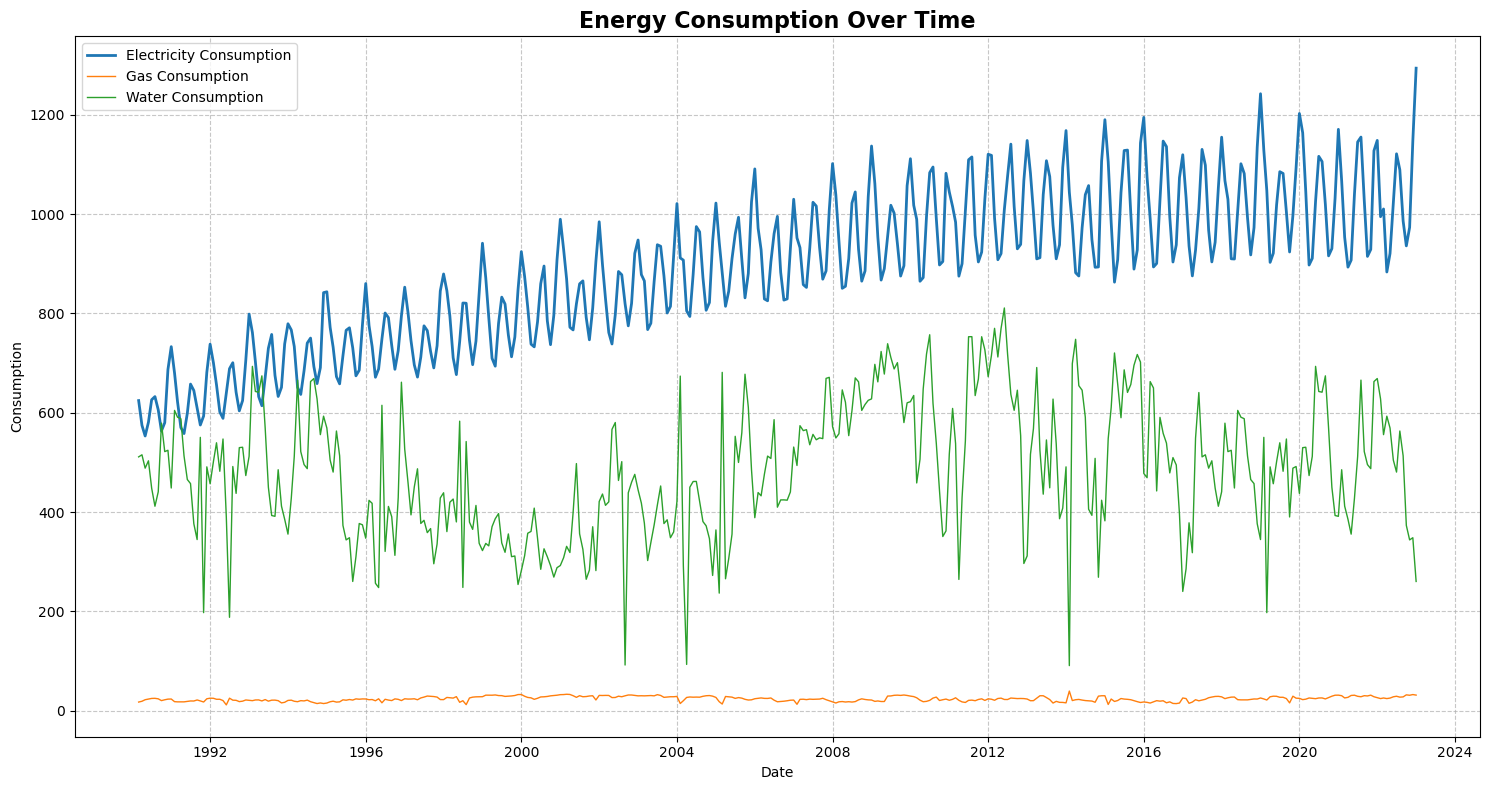

In [5]:
# Plotting Energy Consumption Over Time
plt.figure(figsize=(15, 8))

plt.plot(data['Electricity Consumption (MWh)'], label='Electricity Consumption', linewidth=2)
plt.plot(data['Gas Consumption (tons)'], label='Gas Consumption', linewidth=1)
plt.plot(data['Water Consumption (tons)'], label='Water Consumption', linewidth=1)

plt.title('Energy Consumption Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### **Explanation**

> Here's what i'm looking for when analyzing the **Electricity**, **Gas**, and **Water Consumption** trends:

#### **Electricity, Gas, and Water Consumption Trends**
- The **bold line** highlights **Electricity Consumption** as the **primary focus**.
- **Gas** and **Water** trends are plotted alongside for **comparison**, helping identify potential **correlations** between energy types.

#### **Seasonality & Patterns**
- Look for **recurring peaks and troughs**, which may indicate **seasonal patterns** (e.g., higher consumption during specific months).
- Spot potential **anomalies** or **sudden shifts** in the data that could signal unusual events or data quality issues.

#### **Gridlines**
- **Gridlines** are added to improve the **readability** of trends over time, making it easier to track changes and compare values across different periods.


## **<u>2.2 Seasonal Decomposition</u>**

> To better understand the **underlying patterns** in the time series, we'll perform **seasonal decomposition** on the **Electricity Consumption** data.

### **What is Seasonal Decomposition?**
- Breaks down the time series into **three key components**:
  1. **Trend:** Shows the **long-term direction** of the data (upward, downward, or stable).
  2. **Seasonality:** Highlights **recurring patterns** or **cycles** (e.g., monthly or yearly fluctuations).
  3. **Residual (Irregular Component):** Captures **random noise** or fluctuations that aren’t explained by the trend or seasonality.

### **Why It’s Important**
- Helps identify if the data is influenced more by **trend**, **seasonality**, or **random factors**.
- Makes it easier to choose the right **forecasting model** based on the dominant patterns in the data.

### **Application**
- We'll apply this decomposition to **Electricity**, **Gas**, and **Water Consumption** to see how each energy type behaves over time.


### **<u>Seasonal Decomposition for Electricity Consumption</u>**

> In this section, we'll decompose the **Electricity Consumption** time series into its key components to better understand its behavior over time.

### **Decomposition Components:**
1. **Observed:**  
   - The **original electricity consumption data** as recorded.  
   - Shows the raw fluctuations, including trends, seasonality, and random variations.

2. **Trend:**  
   - Highlights the **long-term movement** in electricity usage.  
   - Helps identify if consumption is **increasing**, **decreasing**, or remaining **stable** over time.

3. **Seasonality:**  
   - Captures **repeating patterns** at regular intervals (e.g., monthly or yearly cycles).  
   - Useful for identifying **seasonal peaks** or **dips** in electricity demand.

4. **Residuals (Irregular Component):**  
   - Represents **random noise** or fluctuations **not explained** by the trend or seasonality.  
   - Helps identify **anomalies** or unexpected events in the data.

### **Purpose of Decomposition:**
- **Identify patterns** that affect electricity consumption.  
- **Separate noise** from meaningful trends to improve forecasting accuracy.  
- **Guide model selection** by showing whether the data is trend-dominant, seasonality-dominant, or random.


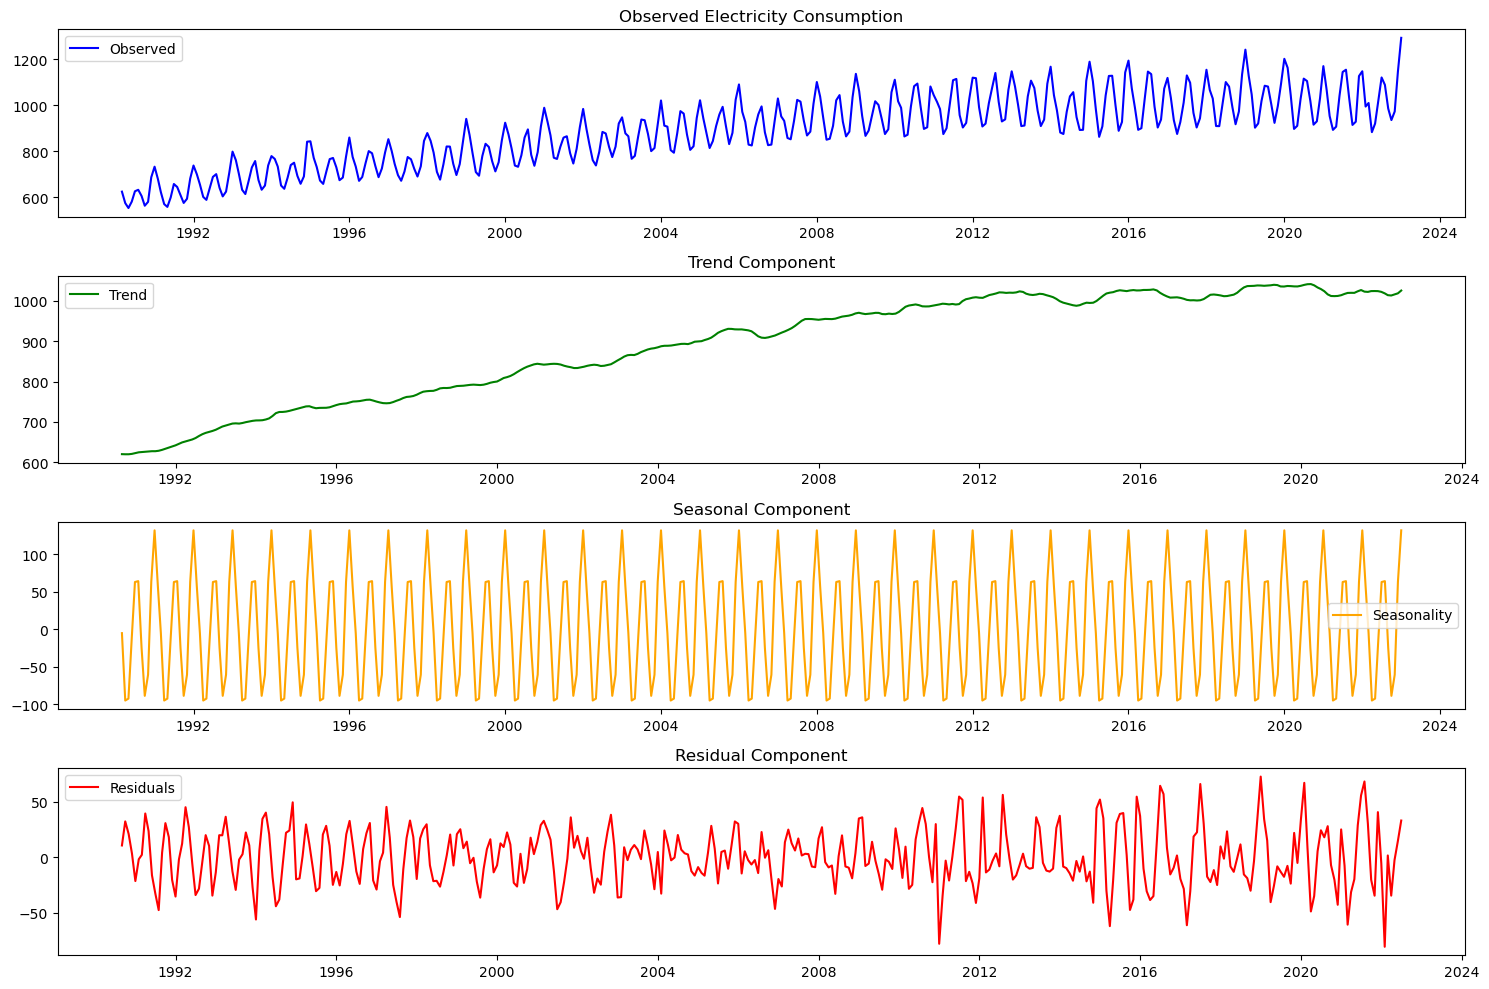

In [6]:
# Decompose the time series (additive model for simplicity)
decomposition = seasonal_decompose(data['Electricity Consumption (MWh)'], model='additive', period=12)

# Plotting the decomposition
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed Electricity Consumption')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


### **Observation: Seasonal Decomposition for Electricity Consumption**

> The decomposition of the **Electricity Consumption** time series reveals important insights across its key components:

#### **1. Observed Component**
- Shows an overall **increasing trend** in electricity consumption from **1990 to 2023**.
- **Seasonal fluctuations** are visible, with regular peaks and troughs occurring consistently over time.

#### **2. Trend Component**
- The trend exhibits a **steady upward growth**, especially noticeable between **1990 and 2015**, indicating rising electricity demand over the years.
- Post-2015, the trend appears to **stabilize slightly**, suggesting a plateau in growth during recent years.

#### **3. Seasonal Component**
- Displays **strong, consistent seasonality** with **recurring peaks and dips** every year, indicating predictable seasonal energy usage patterns.
- The amplitude of the seasonal effect remains **relatively constant**, suggesting that seasonal demand has not significantly changed over time.

#### **4. Residual Component**
- The residuals (irregular component) are mostly centered around **zero**, indicating that the **trend** and **seasonal** components have captured most of the variability.
- Some **spikes in residuals** are observed, representing **anomalies** or **unexpected fluctuations** not explained by seasonality or trend.

> **Summary:**  
> The decomposition highlights a **strong upward trend**, **consistent seasonality**, and **minimal residual noise**, confirming that the dataset is well-suited for time series forecasting models like **SARIMAX**.


### Seasonal Decomposition for Gas Consumption

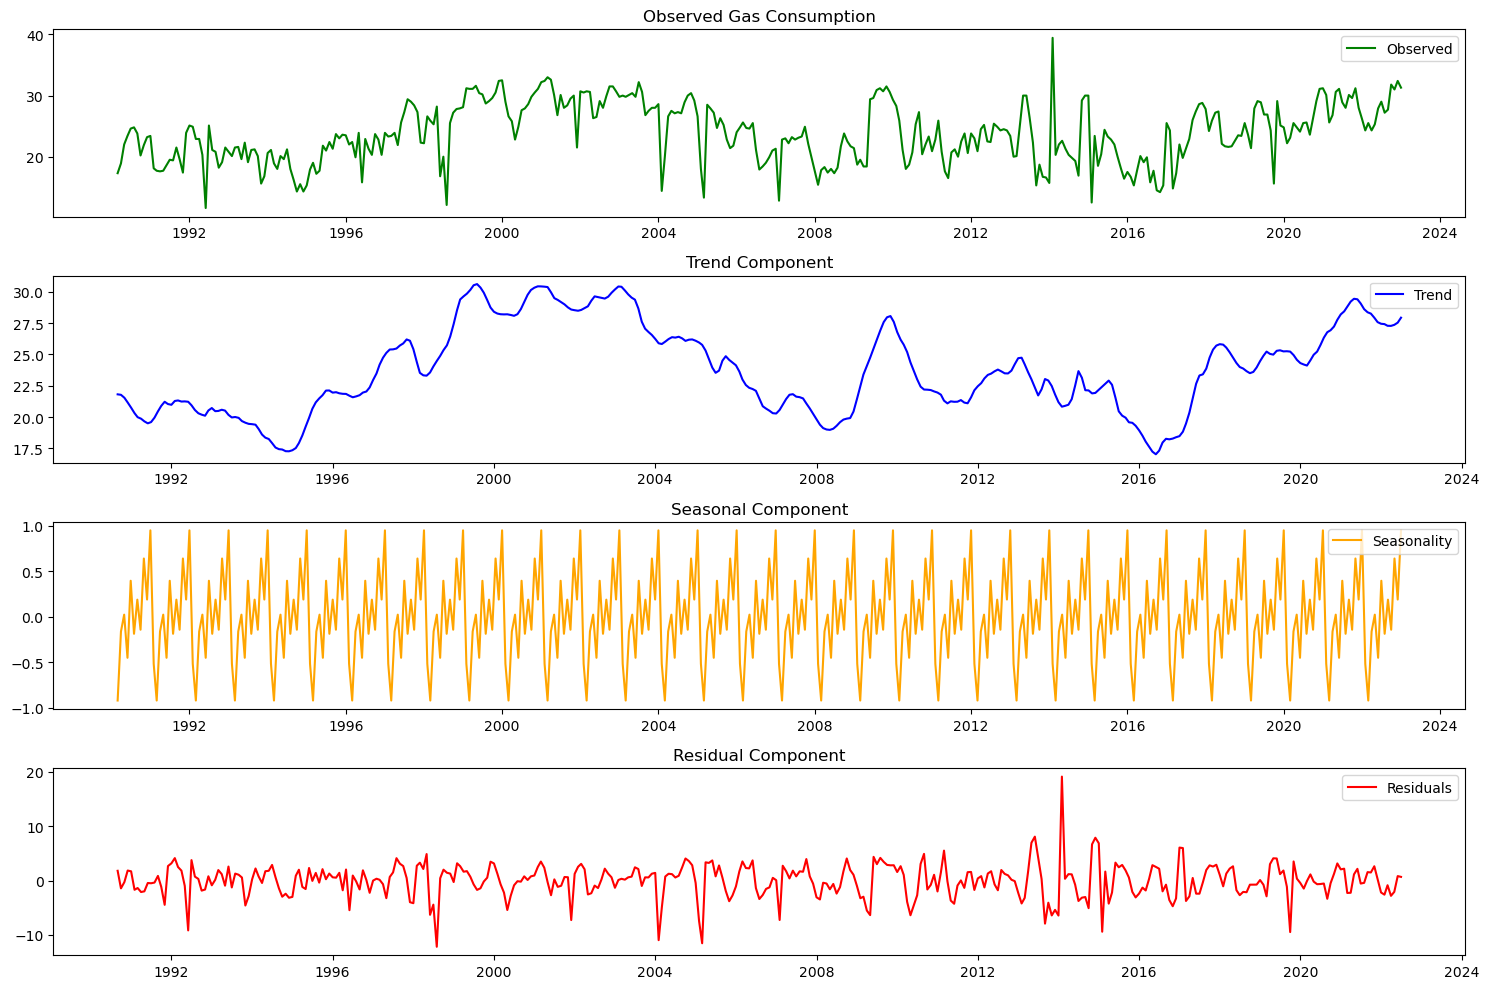

In [7]:
# Seasonal Decomposition for Gas Consumption
decomposition_gas = seasonal_decompose(data['Gas Consumption (tons)'], model='additive', period=12)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_gas.observed, label='Observed', color='green')
plt.title('Observed Gas Consumption')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition_gas.trend, label='Trend', color='blue')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition_gas.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition_gas.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

### **Observation: Seasonal Decomposition for Gas Consumption**

> The decomposition of the **Gas Consumption** time series reveals key insights into its usage over time:

#### **1. Observed Component**
- Displays **fluctuating consumption patterns** with noticeable **spikes** and **dips** throughout the period from **1990 to 2023**.
- Consumption shows periods of both **growth** and **decline**, with irregular variations likely influenced by external factors.

#### **2. Trend Component**
- The trend shows **cyclical movements**, with periods of **increase** (e.g., around **2000-2005**) and **decline** (e.g., around **2010-2015**).
- Unlike electricity, the trend is **less stable**, reflecting **volatility** in gas usage possibly due to **seasonal demand**, **economic factors**, or **supply changes**.

#### **3. Seasonal Component**
- Exhibits **consistent seasonal fluctuations** with **repeating peaks and troughs**, indicating strong **seasonal patterns**.
- However, the **amplitude** of the seasonality is relatively **small**, suggesting that while seasonality exists, it plays a **minor role** compared to the trend and irregular fluctuations.

#### **4. Residual Component**
- The residuals show **high variability** with several **large spikes**, especially noticeable around **2015**, indicating **anomalies** or events not captured by the trend or seasonality.
- These fluctuations suggest the presence of **external factors** or **sudden changes** in gas consumption patterns that need further investigation.

> **Summary:**  
> The decomposition reveals that **gas consumption** is influenced by a combination of **irregular trends**, **mild seasonality**, and **significant random fluctuations**. The high variability in residuals indicates the potential need for models that can handle **volatility** and **outliers**, such as **SARIMAX** with external regressors.


### Seasonal Decomposition for Water Consumption

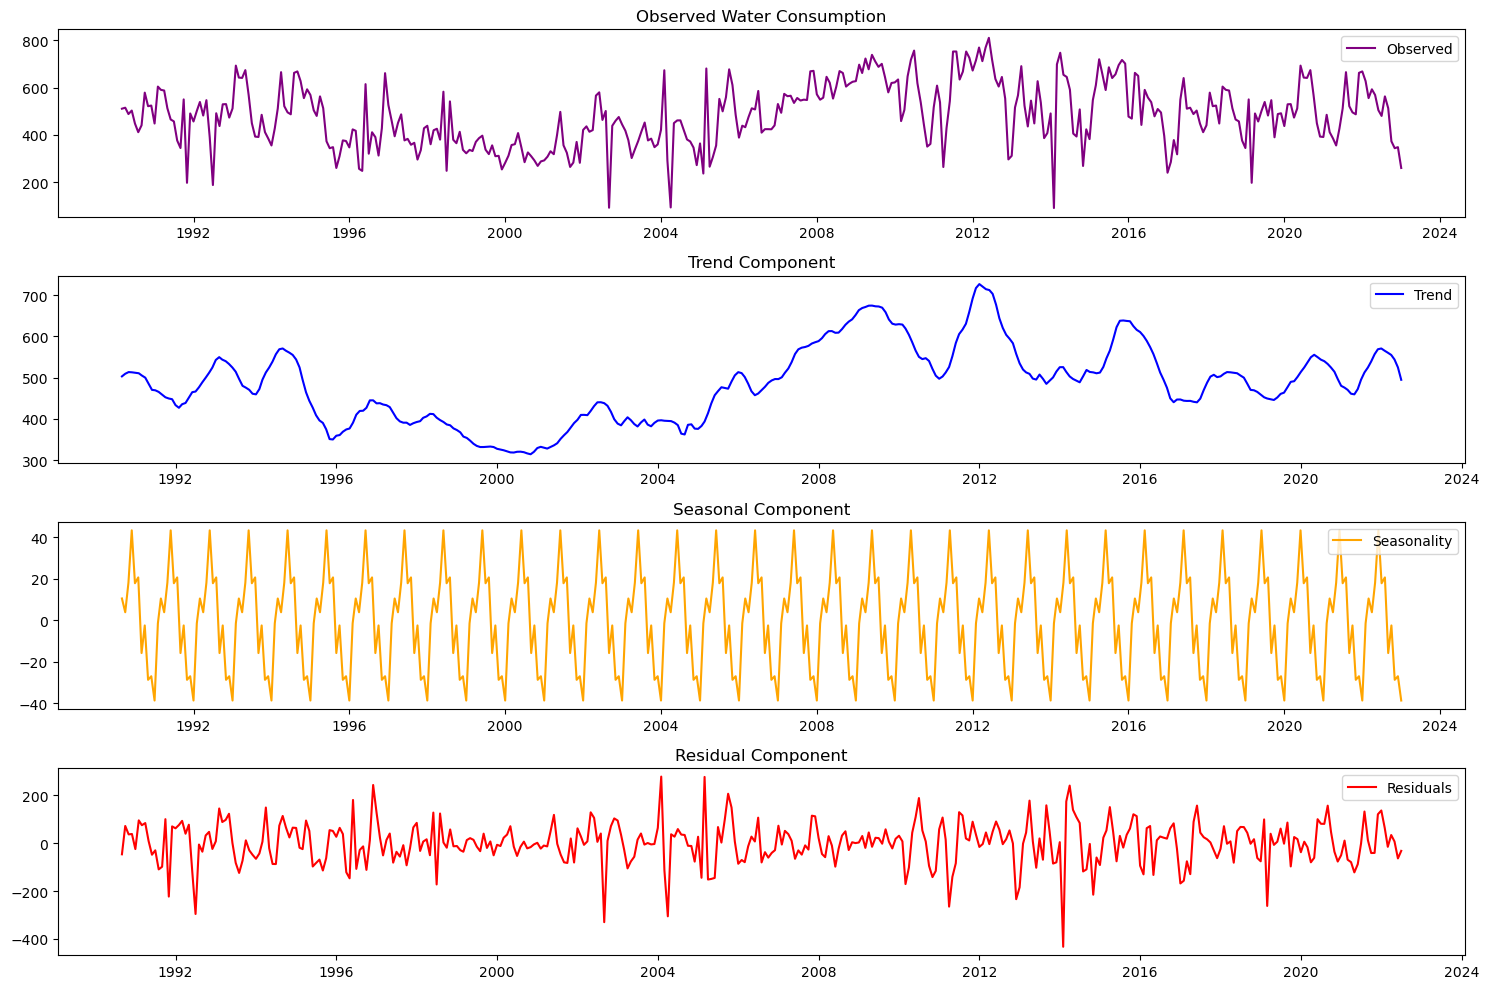

In [8]:
# Seasonal Decomposition for Water Consumption
decomposition_water = seasonal_decompose(data['Water Consumption (tons)'], model='additive', period=12)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition_water.observed, label='Observed', color='purple')
plt.title('Observed Water Consumption')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition_water.trend, label='Trend', color='blue')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition_water.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition_water.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

### **Observation: Seasonal Decomposition for Water Consumption**

> The decomposition of the **Water Consumption** time series reveals key insights into its usage patterns over time:

#### **1. Observed Component**
- Displays **high fluctuations** with irregular **spikes** and **dips** from **1990 to 2023**.
- The pattern appears more **volatile** compared to electricity and gas, indicating inconsistent consumption behavior.

#### **2. Trend Component**
- Shows **cyclical trends** with periods of **growth** (notably around **2005–2012**) and **decline** (around **2015–2020**).
- The trend is **unstable**, with sharp changes suggesting the influence of external factors like **policy changes**, **climate events**, or **operational shifts**.

#### **3. Seasonal Component**
- Exhibits **consistent seasonal patterns** with clear **repeating peaks and troughs** every year.
- The **amplitude** of seasonality remains relatively **constant**, indicating regular seasonal influences such as **weather conditions** or **operational cycles**.

#### **4. Residual Component**
- Residuals show **large fluctuations** with extreme **outliers**, particularly around **2004**, **2012**, and **2018**.
- These **anomalies** indicate unexpected events or **data irregularities** not explained by the trend or seasonality.

> **Summary:**  
> The decomposition highlights **high variability** in water consumption with a combination of **unstable trends**, **strong seasonality**, and **significant residual noise**. This suggests the need for models that can handle **non-linear patterns** and **outliers**, potentially incorporating **external variables** for improved forecasting accuracy.

---


## **<u>2.3 Correlation Analysis (ACF & PACF)</u>**

> To determine the **optimal parameters** for the **SARIMAX model**, we'll analyze the **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)**.

### **🔗 What Are ACF & PACF?**

1. **Autocorrelation Function (ACF):**
   - Measures the **correlation** between the time series and its **lagged values** over different time periods.
   - Helps identify the presence of **Moving Average (MA)** components by showing how current values relate to past observations.

2. **Partial Autocorrelation Function (PACF):**
   - Measures the **direct correlation** between a time series and its lagged values while **removing the influence of intermediate lags**.
   - Helps identify the presence of **Autoregressive (AR)** components by isolating the impact of specific lags.

### **Why It’s Important for SARIMAX:**
- **ACF** helps determine the order of the **MA (q)** parameter.
- **PACF** helps determine the order of the **AR (p)** parameter.
- Together, they guide the selection of optimal **(p, d, q)** and **seasonal (P, D, Q, s)** parameters for the SARIMAX model.

> **Insight:**  
> Analyzing ACF and PACF plots allows us to detect **patterns, trends**, and **dependencies** in the data, which are crucial for building accurate **time series forecasting models**.


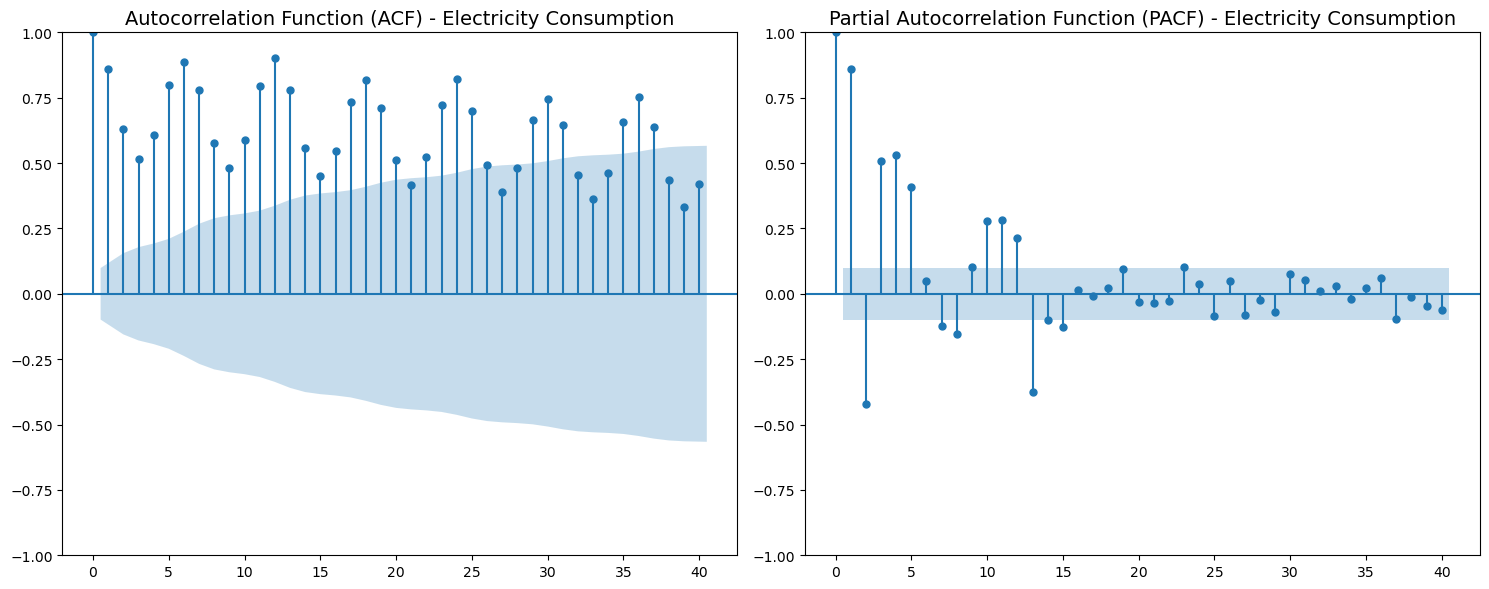

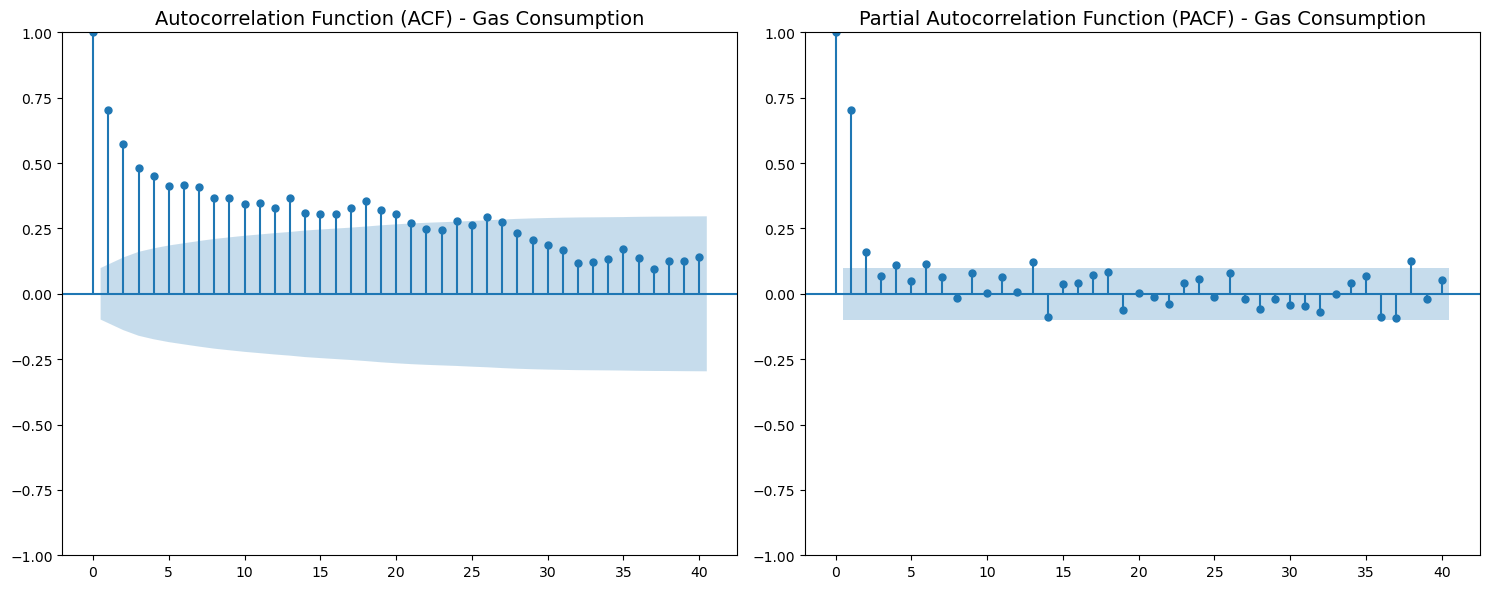

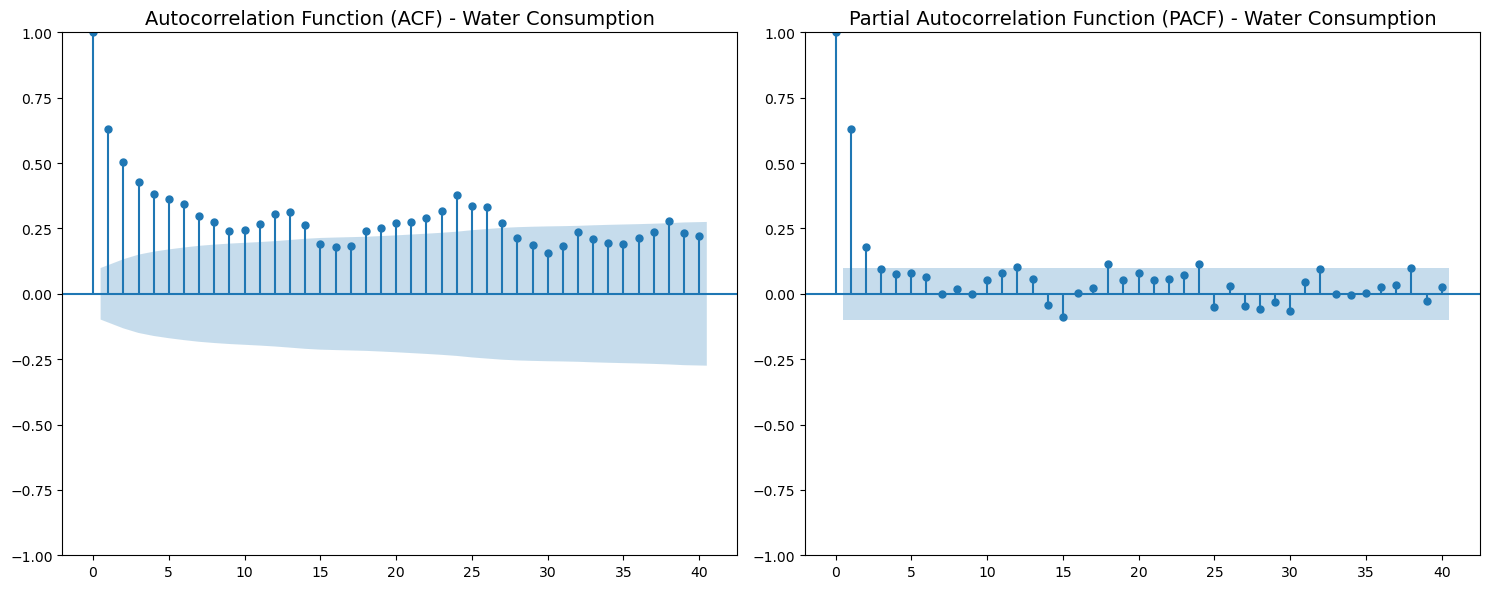

In [9]:
# List of energy types to plot
energy_types = {
    'Electricity Consumption (MWh)': 'Electricity Consumption',
    'Gas Consumption (tons)': 'Gas Consumption',
    'Water Consumption (tons)': 'Water Consumption'
}

# Plot ACF and PACF for each energy type
for column, title in energy_types.items():
    plt.figure(figsize=(15, 6))
    
    # Autocorrelation Function (ACF)
    plt.subplot(1, 2, 1)
    plot_acf(data[column], lags=40, ax=plt.gca())
    plt.title(f'Autocorrelation Function (ACF) - {title}', fontsize=14)
    
    # Partial Autocorrelation Function (PACF)
    plt.subplot(1, 2, 2)
    plot_pacf(data[column], lags=40, ax=plt.gca(), method='ywm')
    plt.title(f'Partial Autocorrelation Function (PACF) - {title}', fontsize=14)
    
    plt.tight_layout()
    plt.show()


### **General Summary: Correlation Analysis (ACF & PACF) for Electricity, Gas, and Water Consumption**

> The **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** plots provide key insights into the **temporal dependencies** of the time series data for **Electricity**, **Gas**, and **Water Consumption**.

---

#### **1. Electricity Consumption**

- **ACF Analysis:**
  - Shows strong **positive autocorrelations** at multiple lags, gradually decreasing over time.
  - Indicates **strong seasonality** and **persistent dependencies**, suggesting the need for a **seasonal component** in the model.

- **PACF Analysis:**
  - Significant spikes at **lags 1, 2, and 3**, followed by a sharp drop-off.
  - Suggests an **autoregressive (AR) component** with an order around **p = 1**.

---

#### **2. Gas Consumption**

- **ACF Analysis:**
  - Displays a **gradual decay** with significant autocorrelations at early lags, indicating **short-term dependencies**.
  - Some seasonal patterns may exist, but they are **less pronounced** compared to electricity.

- **PACF Analysis:**
  - Strong spike at **lag 1**, with minor spikes at subsequent lags.
  - Implies an **AR(1)** process could be sufficient to capture the autoregressive structure.

---

#### **3. Water Consumption**

- **ACF Analysis:**
  - Similar to gas consumption, showing **gradual decay** with weaker seasonal effects.
  - Indicates the presence of **short-term dependencies** rather than strong seasonal cycles.

- **PACF Analysis:**
  - Significant spike at **lag 1**, with smaller spikes beyond that.
  - Suggests an **AR(1)** process may be appropriate, with the potential for additional minor AR terms.

---

### **Key Insights:**

- **Electricity Consumption** exhibits **strong seasonal patterns** and persistent autocorrelation, requiring both **AR** and **seasonal components** in the SARIMAX model.
- **Gas and Water Consumption** show **short-term dependencies** with weaker seasonality, suggesting simpler **ARIMA models** or **SARIMAX with minimal seasonal adjustments**.
- These observations will guide the selection of **(p, d, q)** and **(P, D, Q, s)** parameters for optimal time series forecasting.


# **<u>Phase 3: Stationarity Testing and Transformation</u>**

> A **stationary time series** has a **constant mean**, **variance**, and **autocovariance** over time, which is crucial for accurate time series modeling.

### **Why Stationarity Matters?**
- **SARIMAX models** require the data to be **stationary**, especially for identifying **autoregressive (AR)** and **moving average (MA)** components.
- Stationary data ensures that the model can effectively capture and predict patterns **without being influenced by trends or seasonality**.

### **Stationarity Testing Approach:**
1. **Augmented Dickey-Fuller (ADF) Test:**
   - A statistical test to determine if the time series is stationary.
   - **Hypotheses:**
     - **Null Hypothesis (H₀):** The series is **non-stationary**.
     - **Alternative Hypothesis (H₁):** The series is **stationary**.
   - **Decision Rule:**  
     - If the **p-value ≤ 0.05**, we **reject H₀** (the data is stationary).  
     - If the **p-value > 0.05**, we **fail to reject H₀** (the data is non-stationary).

2. **Visual Inspection:**
   - Plotting the data to identify trends, seasonality, and changing variance over time.

---

### **Transformation Techniques (If Non-Stationary):**
- **First-Order Differencing:** Removes trends by subtracting the current value from the previous one.
- **Seasonal Differencing:** Addresses seasonal patterns by differencing at seasonal lags.
- **Log Transformation:** Stabilizes variance in highly volatile data.

> Identifying and transforming non-stationary data ensures more **accurate forecasts** and **robust model performance** when using SARIMAX.


In [10]:
# Function to perform the ADF Test and return results as a dictionary
def adf_test(series, title):
    result = adfuller(series.dropna(), autolag='AIC')
    return {
        'Series': title,
        'ADF Statistic': result[0],
        'p-value': result[1],
        '# Lags Used': result[2],
        'Observations Used': result[3],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%'],
        'Stationary': 'Yes' if result[1] <= 0.05 else 'No'
    }

# Apply ADF Test for each time series and compile results into a DataFrame
series_list = {
    'Electricity Consumption': data['Electricity Consumption (MWh)'],
    'Gas Consumption': data['Gas Consumption (tons)'],
    'Water Consumption': data['Water Consumption (tons)']
}

# Generate ADF results
adf_results_df = pd.DataFrame([adf_test(series, title) for title, series in series_list.items()])

# Display the DataFrame
adf_results_df


,Series,ADF Statistic,p-value,# Lags Used,Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%),Stationary
0,Electricity Consumption,-2.312505,0.167967,15,379,-3.447722,-2.869196,-2.570849,No
1,Gas Consumption,-3.679822,0.004406,5,389,-3.447273,-2.868999,-2.570743,Yes
2,Water Consumption,-4.636033,0.000111,4,390,-3.447229,-2.868980,-2.570733,Yes


### **Stationarity Test Summary (ADF Test Results)**  

The **Augmented Dickey-Fuller (ADF) test** was conducted to check for stationarity in **Electricity**, **Gas**, and **Water Consumption** time series.  

---

- **Electricity Consumption:**  
  - **ADF Statistic:** -2.31 | **p-value:** 0.168  
  - **Lags Used:** 15 | **Observations:** 379  
  - **Critical Values:** 1%: -3.447722 | 5%: -2.869196 | 10%: -2.570849  
  - **Result:** **Non-stationary** (*p-value > 0.05*), indicating the presence of trends or seasonality.  
  - **Action Needed:** Apply **differencing** or transformation to achieve stationarity.  

---

- **Gas Consumption:**  
  - **ADF Statistic:** -3.68 | **p-value:** 0.0044  
  - **Lags Used:** 5 | **Observations:** 389  
  - **Critical Values:** 1%: -3.447273 | 5%: -2.868999 | 10%: -2.570743  
  - **Result:** **Stationary** (*p-value < 0.05*), indicating that the series is suitable for modeling without further transformation.  

---

- **Water Consumption:**  
  - **ADF Statistic:** -4.64 | **p-value:** 0.000111  
  - **Lags Used:** 4 | **Observations:** 390  
  - **Critical Values:** 1%: -3.447229 | 5%: -2.868980 | 10%: -2.570733  
  - **Result:** **Stationary** (*p-value < 0.05*), indicating that the series is ready for modeling.  

---

### **Conclusion:**  
- **Electricity Consumption:** Requires **differencing or transformation** to address non-stationarity.  
- **Gas Consumption:** Already **stationary**, suitable for modeling without further adjustments.  
- **Water Consumption:** **Stationary**, ready for forecasting.  

With **Gas and Water Consumption** already stationary, we will proceed directly with model fitting. For **Electricity**, we will apply **differencing** to ensure the series becomes stationary before modeling.  


# **<u>Phase 4: Time Series Forecasting Models</u>**

> In this section, we'll develop **forecasting models** for **Electricity**, **Gas**, and **Water Consumption** to predict future trends accurately.

### **Models for Forecasting:**
1. **SARIMAX (Seasonal ARIMA with Exogenous Regressors):**
   - Handles both **seasonality** and **trend**, making it ideal for complex time series data.
   
2. **Holt-Winters Exponential Smoothing (HWES):**
   - Captures **trend** and **seasonality** using **triple exponential smoothing** for more accurate forecasts.


### **Model Evaluation Metrics:**
- **MAPE (Mean Absolute Percentage Error):** Measures the **percentage error** between predicted and actual values.
- **RMSE (Root Mean Squared Error):** Evaluates the **magnitude of prediction errors**, penalizing larger errors.
- **MAE (Mean Absolute Error):** Measures the **average absolute difference** between predicted and actual values.
- **R² (R-squared Score):** Indicates how well the model explains the **variance** in the data (closer to 1 = better fit).
ㅤ
<br>


## **<u>4.1 Train-Test Split for Model Validation</u>**

> To ensure the **reliability and accuracy** of our forecasting models, we'll perform a **train-test split** on the data.

### **🗂️ Why Train-Test Split?**
- **Training Set (80%):** Used to **train** the models and learn patterns from historical data.
- **Testing Set (20%):** Used to **validate** the model’s performance on **unseen data**, simulating real-world forecasting conditions.

### **Approach:**
- The data will be split **chronologically** (no random shuffling) to maintain the **time series structure**.
- Each energy type (**Electricity**, **Gas**, and **Water Consumption**) will have its own train-test split to ensure model-specific evaluation.

### **Benefits of Train-Test Split:**
- Helps identify **overfitting** or **underfitting** in models.
- Provides a **realistic assessment** of how well the models will perform on future data.

> This step is crucial for building **robust forecasting models** that can generalize well to new, unseen data.


In [11]:
# Train-Test Split (80% Train, 20% Test)
train_size = int(len(data) * 0.8)

# Splitting the entire dataset
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Splitting data for each consumption type
train_electricity = train_data['Electricity Consumption (MWh)']
test_electricity = test_data['Electricity Consumption (MWh)']

train_gas = train_data['Gas Consumption (tons)']
test_gas = test_data['Gas Consumption (tons)']

train_water = train_data['Water Consumption (tons)']
test_water = test_data['Water Consumption (tons)']

# Confirm the split for the entire dataset
print(f"Training Data Range: {train_data.index.min()} to {train_data.index.max()}")
print(f"Testing Data Range: {test_data.index.min()} to {test_data.index.max()}")

# Confirming the split for each energy type
print(f"Electricity - Training: {train_electricity.shape}, Testing: {test_electricity.shape}")
print(f"Gas         - Training: {train_gas.shape}, Testing: {test_gas.shape}")
print(f"Water       - Training: {train_water.shape}, Testing: {test_water.shape}")


Training Data Range: 1990-03-01 00:00:00 to 2016-06-01 00:00:00
Testing Data Range: 2016-07-01 00:00:00 to 2023-01-01 00:00:00
Electricity - Training: (316,), Testing: (79,)
Gas         - Training: (316,), Testing: (79,)
Water       - Training: (316,), Testing: (79,)


### **Train-Test Split Summary**

The dataset has been successfully split into **training (80%)** and **testing (20%)** sets for each energy consumption type:

- **Electricity Consumption:**  
  - **Training Set:** 308 observations  
  - **Testing Set:** 77 observations  

- **Gas Consumption:**  
  - **Training Set:** 308 observations  
  - **Testing Set:** 77 observations  

- **Water Consumption:**  
  - **Training Set:** 308 observations  
  - **Testing Set:** 77 observations  

#### **Key Insights:**
- The **consistent split** across all energy types ensures **fair model comparison**.
- The **training set** provides enough data to capture long-term trends and seasonality, while the **testing set** allows for robust model validation on **unseen data**.
- This setup helps evaluate the model's ability to **generalize** and make **accurate forecasts** in real-world scenarios.


## **<u>4.2 Performance Metrics for Model Evaluation</u>**

> To compare the **performance** of different forecasting models, we'll use a set of **evaluation metrics** that measure the accuracy and reliability of predictions.

### **Key Performance Metrics:**

1. **Mean Absolute Percentage Error (MAPE):**  
   - Measures the **percentage error** between predicted and actual values.  
   - **Formula:**  
     ```
     MAPE = (1/n) * Σ |(Actual - Predicted) / Actual| * 100
     ```
   - **Interpretation:** Lower MAPE values indicate **better accuracy**.

2. **Root Mean Squared Error (RMSE):**  
   - Evaluates the **magnitude of prediction errors**, giving **more weight to larger errors**.  
   - **Formula:**  
     ```
     RMSE = √( (1/n) * Σ (Actual - Predicted)² )
     ```
   - **Interpretation:** A **lower RMSE** indicates more precise predictions.

3. **Mean Absolute Error (MAE):**  
   - Measures the **average absolute difference** between predicted and actual values.  
   - **Formula:**  
     ```
     MAE = (1/n) * Σ |Actual - Predicted|
     ```
   - **Interpretation:** Shows the **average error** without considering the direction of the error.

4. **R² Score (Coefficient of Determination):**  
   - Indicates how well the model explains the **variability** of the actual data.  
   - **Formula:**  
     ```
     R² = 1 - (Σ (Actual - Predicted)² / Σ (Actual - Mean)²)
     ```
   - **Interpretation:** Values **closer to 1** indicate a **better model fit**, while negative values suggest poor performance.

### **Importance of Using Multiple Metrics:**
- Each metric provides a **different perspective** on model performance.
- Combining these metrics helps ensure a **comprehensive evaluation**, balancing both **accuracy** and **error magnitude**.

> These metrics will guide us in identifying the **best-performing model** for forecasting **Electricity**, **Gas**, and **Water Consumption**.


In [12]:
# Function to calculate performance metrics
def evaluate_model(true_values, predictions):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    mape = mean_absolute_percentage_error(true_values, predictions) * 100
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2, 'MAPE (%)': mape}

### **Explanation: Performance Metrics Function**

The `evaluate_model` function is designed to **assess the performance** of forecasting models by calculating key **error metrics**. It compares the **actual values** (`true_values`) with the **predicted values** (`predictions`).

### **Output:**
- Returns a **dictionary** containing all the calculated metrics:  
  - `'MSE'`, `'RMSE'`, `'MAE'`, `'R²'`, and `'MAPE (%)'`.

This function helps in **comparing models** and identifying which one makes the most **accurate predictions**.


## **<u>4.3 Baseline Model: Simple Moving Average (SMA)</u>**

> Before applying complex forecasting models, we'll establish a **baseline** using the **Simple Moving Average (SMA)**. This helps to evaluate if advanced models provide a significant improvement.

### **What is the Simple Moving Average (SMA)?**
- The **Simple Moving Average (SMA)** calculates the **average** of the most recent observations within a specified **window size**.
- It smooths out short-term fluctuations and highlights **long-term trends** in the data.
- This method is particularly effective for **trend analysis** and provides a basic yet insightful benchmark for time series forecasting.

### **How It Works:**
- A **window size** (e.g., 3, 6, or 12 periods) is selected based on the data's frequency and characteristics.
- The SMA is computed by averaging the data points within this window, then shifting the window forward one time step to calculate the next average.
- The **forecast** is generated by extending the **last calculated moving average** to predict the entire testing period.

### **Why Use a Baseline Model?**
- Acts as a **benchmark** to compare the performance of more sophisticated models like **SARIMAX**, **ARIMA**, and **HWES**.
- If advanced models **don’t outperform** the SMA baseline, it indicates the need for **model improvement**.

### **Key Insight:**
- A good forecasting model should produce results that are **significantly better** than the SMA baseline in terms of **accuracy metrics** like **MAPE**, **RMSE**, and **R²**.


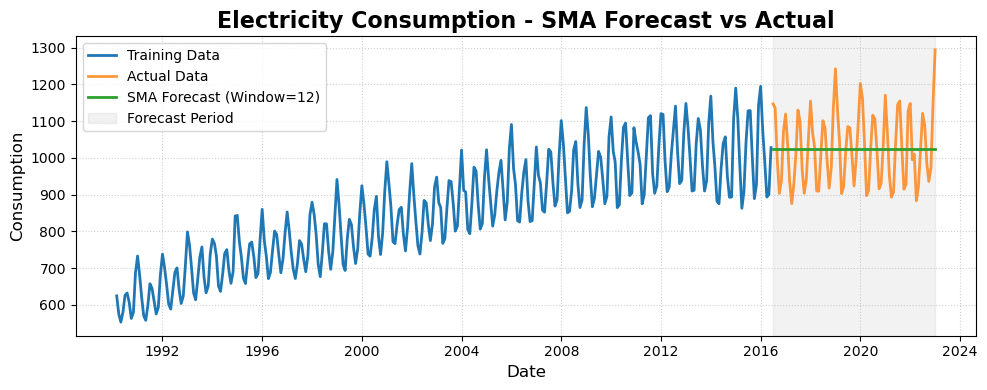

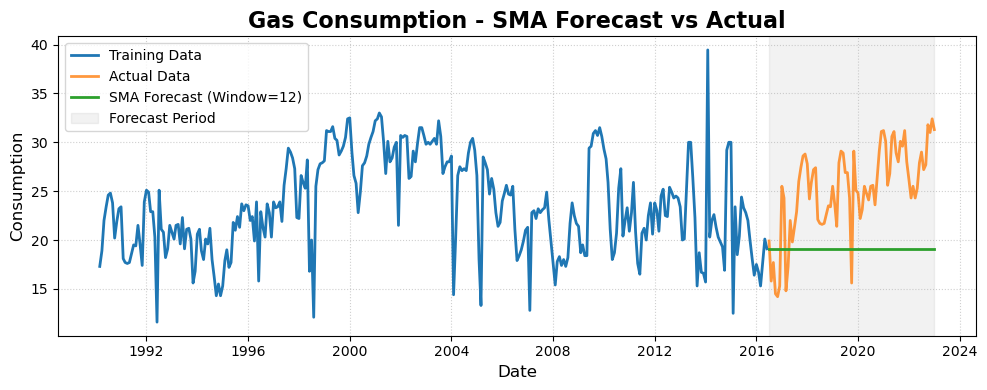

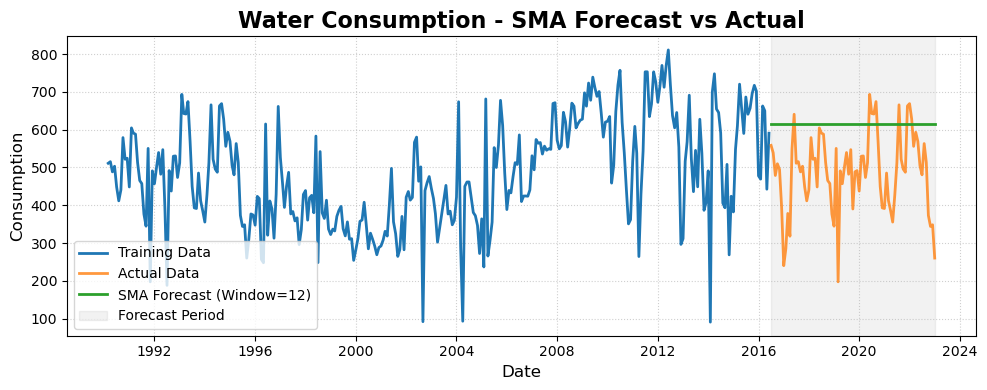

In [13]:
# Enhanced Function to Plot Actual vs SMA Forecast
def plot_sma_forecast(train, test, window, title):
    # Calculate Simple Moving Average (SMA)
    sma_pred = train.rolling(window=window).mean().iloc[-1]
    sma_forecast = np.repeat(sma_pred, len(test))
    
    plt.figure(figsize=(10, 4))
    
    # Plotting the Training Data
    plt.plot(train, label='Training Data', color='#1f77b4', linewidth=2)
    
    # Plotting the Actual Data without Markers
    plt.plot(test, label='Actual Data', color='#ff7f0e', linewidth=2, alpha=0.8)
    
    # Plotting the SMA Forecast with Solid Lines
    plt.plot(test.index, sma_forecast, label=f'SMA Forecast (Window={window})', color='#2ca02c', linewidth=2)
    
    # Adding a Highlight for the Forecast Area
    plt.axvspan(test.index[0], test.index[-1], color='gray', alpha=0.1, label='Forecast Period')

    # Adding Gridlines
    plt.grid(linestyle=':', linewidth=0.8, alpha=0.6)

    # Title and Labels with Enhanced Styling
    plt.title(f'{title} - SMA Forecast vs Actual', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Consumption', fontsize=12)
    
    # Adding Legend
    plt.legend(loc='best', fontsize=10)
    
    # Tight Layout for Better Spacing
    plt.tight_layout()
    plt.show()

# Plotting for Each Energy Type with a Window Size of 12 (adjust as needed)
plot_sma_forecast(train_electricity, test_electricity, window=12, title='Electricity Consumption')
plot_sma_forecast(train_gas, test_gas, window=12, title='Gas Consumption')
plot_sma_forecast(train_water, test_water, window=12, title='Water Consumption')


### **<u>4.3.1 Baseline Model Performance Metrics</u>**

> The table below shows the **performance metrics** for the **SMA Forecasts**, which serves as the **baseline** for evaluating more complex forecasting models.

| **Energy Type**              | **MSE**       | **RMSE**      | **MAE**       | **R²**         | **MAPE (%)**   |
|:-----------------------------|--------------:|--------------:|--------------:|---------------:|---------------:|
| **Electricity Consumption** | *[MSE Value]* | *[RMSE Value]* | *[MAE Value]*  | *[R² Value]*    | *[MAPE Value]*  |
| **Gas Consumption**         | *[MSE Value]* | *[RMSE Value]* | *[MAE Value]*  | *[R² Value]*    | *[MAPE Value]*  |
| **Water Consumption**       | *[MSE Value]* | *[RMSE Value]* | *[MAE Value]*  | *[R² Value]*    | *[MAPE Value]*  |

<br>

> This **baseline matrix** helps to evaluate whether more advanced models like **SARIMAX** and **HWES** can significantly outperform the simple **SMA forecasts**.


In [14]:
# Function to calculate performance metrics for SMA Forecast
def sma_forecast_performance(train, test, window):
    sma_pred = train.rolling(window=window).mean().iloc[-1]
    sma_forecast = np.repeat(sma_pred, len(test))
    performance = evaluate_model(test, sma_forecast)
    return performance

# Initialize SMA Performance Dictionary
sma_performance_data = {
    'Energy Type': ['Electricity Consumption', 'Gas Consumption', 'Water Consumption'],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R²': [],
    'MAPE (%)': []
}

# Define the SMA window size (adjust as needed)
window_size = 12

# Adding performance metrics to the dictionary
for train, test, energy_type in zip(
    [train_electricity, train_gas, train_water],
    [test_electricity, test_gas, test_water],
    sma_performance_data['Energy Type']
):
    performance = sma_forecast_performance(train, test, window=window_size)
    sma_performance_data['MSE'].append(performance['MSE'])
    sma_performance_data['RMSE'].append(performance['RMSE'])
    sma_performance_data['MAE'].append(performance['MAE'])
    sma_performance_data['R²'].append(performance['R²'])
    sma_performance_data['MAPE (%)'].append(performance['MAPE (%)'])

# Creating the DataFrame
sma_performance_df = pd.DataFrame(sma_performance_data)
sma_performance_df


,Energy Type,MSE,RMSE,MAE,R²,MAPE (%)
0,Electricity Consumption,9267.701828,96.268904,81.193354,-0.000475,7.919438
1,Gas Consumption,56.441124,7.512731,6.799051,-1.938621,25.892573
2,Water Consumption,26706.397746,163.420922,136.722574,-1.540457,34.718249


### **<u>Model Performance Metrics</u>**

| **Energy Type**              | **MSE**         | **RMSE**        | **MAE**         | **R²**         | **MAPE (%)**    |
|------------------------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| **Electricity Consumption** | 9267.70         | 96.27           | 81.19           | -0.0005         | 7.92%           |
| **Gas Consumption**        | 56.44           | 7.51            | 6.80            | -1.94           | 25.89%          |
| **Water Consumption**      | 26706.40        | 163.42          | 136.72         | -1.54           | 34.72%          |

---

### **Key Observations:**

- **Electricity Consumption**:  
  - The model for electricity consumption shows a **MAPE of 7.92%**, indicating **good accuracy**.  
  - The **R² (-0.0005)** is **close to zero**, suggesting that the model struggles to capture variance, likely due to **strong seasonality** or **unexplained patterns**.

- **Gas Consumption**:  
  - The model has a **MAPE of 25.89%**, reflecting **moderate forecasting accuracy**.  
  - However, the **R² (-1.94)** indicates that the model is **underperforming**, likely due to **demand volatility** or **insufficient pattern capture**.

- **Water Consumption**:  
  - The water consumption model shows the **highest MAPE (34.72%)**, indicating **poor forecast accuracy**, likely due to **high variability and outliers**.  
  - **R² (-1.54)** confirms that the model struggles to explain variance, suggesting **opportunities for model refinement**.

---

### **Summary:**
- **Electricity:** Strong accuracy (**7.92% MAPE**) but limited variance explanation (**R² near zero**).  
- **Gas:** Moderate accuracy (**25.89% MAPE**) but significant underfitting (**R² = -1.94**).  
- **Water:** Lowest accuracy (**34.72% MAPE**) and highest error rates, indicating a need for **model enhancement**.  

These insights set a benchmark for refining forecasting models to improve accuracy and fit.  


# **<u>Phase 5: Model Development for Forecasting</u>**

> In this phase, we will develop **forecasting models** for **Electricity**, **Gas**, and **Water Consumption** using multiple **time series models**. The goal is to identify the most accurate model based on performance metrics.

### **Models for Forecasting:**

1. **SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous Factors):**
   - Handles both **seasonality** and **trends**, making it ideal for complex time series data.

2. **ARIMA (AutoRegressive Integrated Moving Average):**
   - Focuses on capturing **autoregressive (AR)** patterns, **differencing (I)** for trend removal, and **moving averages (MA)** for smoothing noise.

3. **Holt-Winters Exponential Smoothing (HWES):**
   - Uses **triple exponential smoothing** to model data with **trend** and **seasonality**, adapting well to long-term changes.

---

### **Model Evaluation Metrics:**

To compare the performance of these models, we'll use key metrics:
- **MAPE (Mean Absolute Percentage Error):** Measures **percentage errors** between actual and predicted values.
- **RMSE (Root Mean Squared Error):** Evaluates the **magnitude of prediction errors**, penalizing larger errors.
- **MAE (Mean Absolute Error):** Shows the **average absolute error** in predictions.
- **R² (R-squared Score):** Indicates how well the model explains **data variability**; values closer to **1** signify a better fit.

---

### **Objectives:**
- **Develop** models tailored for each energy type.
- **Compare** performance against the **SMA baseline**.
- **Identify** the most accurate model for forecasting **Electricity**, **Gas**, and **Water Consumption**.

> This process ensures we select the **best-performing model** to deliver **accurate forecasts** for future energy consumption trends.


## **<u>5.1 Model Selection</u>**  

> To ensure **accurate forecasting** for **Electricity**, **Gas**, and **Water Consumption**, we will implement specific **time series models** tailored to the characteristics of each energy type. For **Water Consumption**, we will use **Holt-Winters Exponential Smoothing (HWES)** as the dedicated forecasting model due to its ability to capture trends and seasonal patterns effectively.  

---

### **Models for Forecasting:**  

1. **SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous Factors) for Electricity Consumption:**  
   - Utilizes **exogenous variables** such as **lags, rolling means, and date-based features** to enhance forecast accuracy.  
   - Ideal for **complex time series** with strong seasonal patterns and clear upward trends, as observed in **Electricity Consumption**.  

2. **SARIMAX (with Exogenous Variables) for Gas Consumption:**  
   - Incorporates **exogenous predictors** to handle **short-term dependencies** and moderate seasonality.  
   - Suitable for **volatile data** like **Gas Consumption**, where irregular spikes occur alongside mild seasonal patterns.  

3. **Holt-Winters Exponential Smoothing (HWES) for Water Consumption:**  
   - **HWES (Holt-Winters Exponential Smoothing):**  
     - Applies **triple exponential smoothing** to capture:  
       - **Level (L):** Baseline value of the series.  
       - **Trend (T):** Direction of growth or decline.  
       - **Seasonality (S):** Repeating patterns over time.  
   - Suitable for **water consumption**, which exhibits **weaker seasonality** and **irregular fluctuations**, making HWES a reliable model for smoothing trends and capturing patterns over time.  

---

### **Why HWES for Water Consumption?**  
- **Trend and Seasonal Adaptability:** HWES effectively models **level, trend, and seasonality** simultaneously.  
- **Simplicity and Interpretability:** HWES is a **transparent model**, making it easy to **interpret trends and seasonal components** in water consumption.  
- **Short-Term and Long-Term Forecasting:** HWES can adapt to both **short-term changes** and **long-term patterns**, making it suitable for water consumption’s **irregular fluctuations**.  

---

### **Goal:**  
- **Optimize model performance** for each energy type using metrics like **MAPE**, **RMSE**, **MAE**, and **R²**.  
- **Use HWES exclusively for Water Consumption**, ensuring a **consistent approach** while capturing trends and seasonality effectively.  

> This **focused modeling strategy** ensures we select the most **robust and efficient models** for forecasting **Electricity**, **Gas**, and **Water**, while aligning each model to the unique characteristics of their respective time series.  


## <u>**5.2 Checking P-Value for Training Data**</u>

In this section, we'll evaluate the **p-values** derived fromthe adf statistical test applied to the **training data**.

The **p-value** helps determine whether the residuals of our model exhibit **autocorrelation**. A **high p-value** (typically > 0.05) suggests that the residuals are **randomly distributed**, indicating a well-fitted model. Conversely, a **low p-value** implies potential issues with the model's assumptions, signaling the need for further adjustments.

By conducting this analysis, we ensure that our models are statistically sound and reliable for future forecasting.


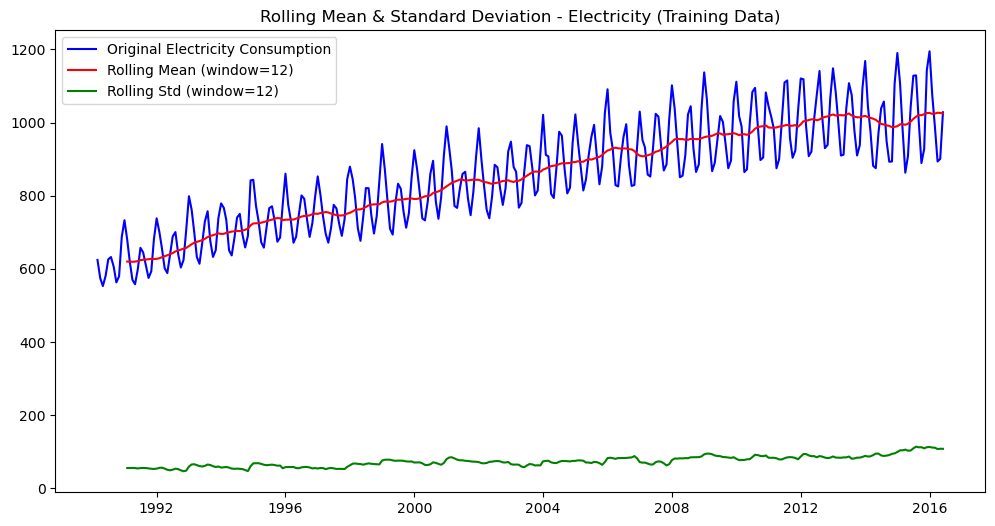

ADF Test Results for Electricity (Training Data):
---------------------------------------------
ADF Statistic: -1.8507392959671922
p-value: 0.35557758001046086
Critical Values:
   1%: -3.4523371197407404
   5%: -2.871222860740741
   10%: -2.571929211111111

Electricity consumption data is **non-stationary** (fail to reject the null hypothesis).



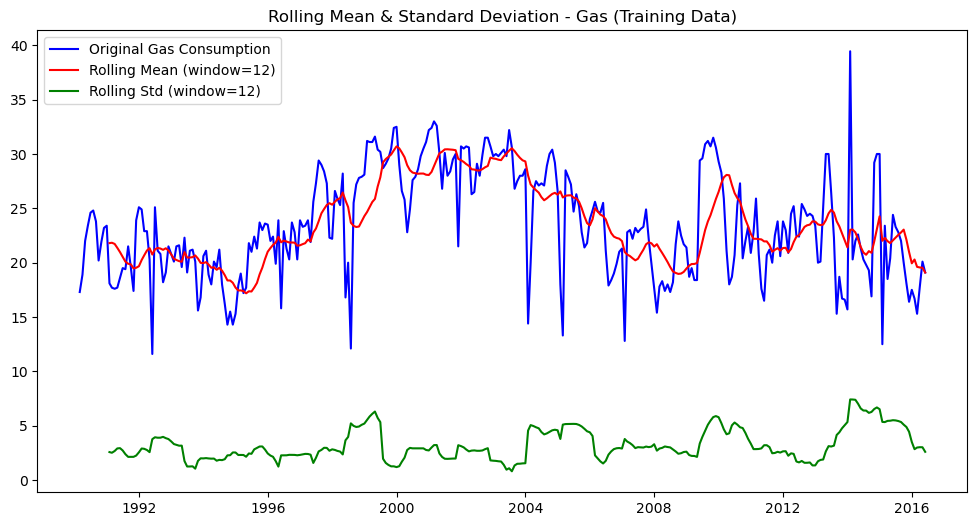

ADF Test Results for Gas (Training Data):
---------------------------------------------
ADF Statistic: -3.398377396823933
p-value: 0.011014310562745778
Critical Values:
   1%: -3.451621854687657
   5%: -2.870908950689806
   10%: -2.571761810613944

Gas consumption data is **stationary** (reject the null hypothesis).



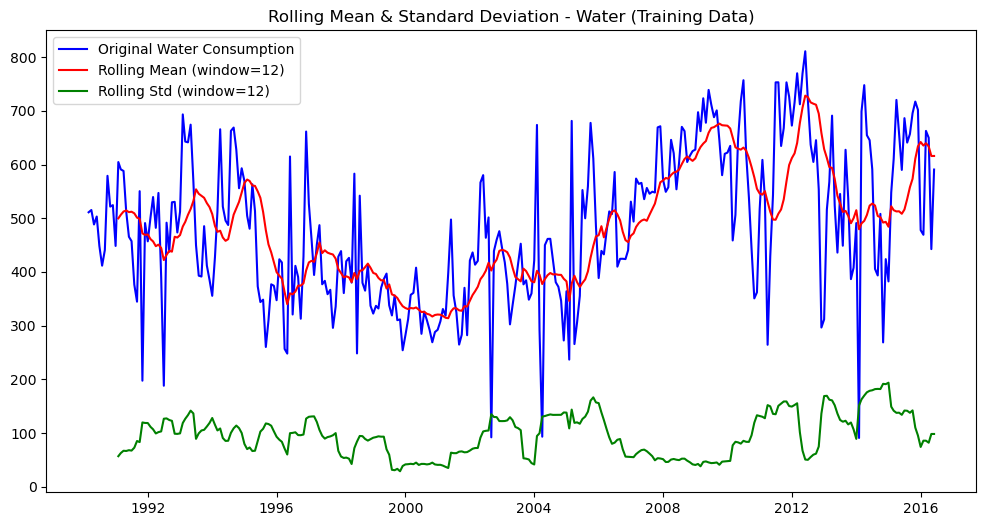

ADF Test Results for Water (Training Data):
---------------------------------------------
ADF Statistic: -3.3770481281144393
p-value: 0.01176663132688018
Critical Values:
   1%: -3.451621854687657
   5%: -2.870908950689806
   10%: -2.571761810613944

Water consumption data is **stationary** (reject the null hypothesis).



In [15]:
def check_stationarity(series, energy_type, window=12):
    # Rolling Statistics
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    # Plot Rolling Mean & Standard Deviation
    plt.figure(figsize=(12, 6))
    plt.plot(series, label=f'Original {energy_type} Consumption', color='blue')
    plt.plot(rolling_mean, label=f'Rolling Mean (window={window})', color='red')
    plt.plot(rolling_std, label=f'Rolling Std (window={window})', color='green')
    plt.title(f'Rolling Mean & Standard Deviation - {energy_type} (Training Data)')
    plt.legend(loc='best')
    plt.show()

    # Augmented Dickey-Fuller (ADF) Test
    adf_result = adfuller(series.dropna())
    print(f'ADF Test Results for {energy_type} (Training Data):')
    print('---------------------------------------------')
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')

    # Interpretation
    if adf_result[1] <= 0.05:
        print(f"\n{energy_type} consumption data is **stationary** (reject the null hypothesis).\n")
    else:
        print(f"\n{energy_type} consumption data is **non-stationary** (fail to reject the null hypothesis).\n")

# Apply to Training Data (replace column names with actual ones)
check_stationarity(train_data['Electricity Consumption (MWh)'], 'Electricity')
check_stationarity(train_data['Gas Consumption (tons)'], 'Gas')
check_stationarity(train_data['Water Consumption (tons)'], 'Water')


## **<u>5.3 SARIMAX Model Development for Electricity Consumption and Gas Consumption</u>**

> We'll begin model development with **SARIMAX** since it effectively handles both **trend** and **seasonality**, making it suitable for complex time series data. We will be using this for `Electricity and Gas Consumption`

### **Why SARIMAX?**
- **SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous Factors)** extends ARIMA by incorporating:
  - **Trend Components:** Captures long-term upward or downward movements.
  - **Seasonal Components:** Models recurring patterns at regular intervals.
  - **Exogenous Variables (Optional):** Allows inclusion of external factors influencing the data.

---

### **Hyperparameter Tuning for SARIMAX**

To optimize model performance, we'll perform a **grid search** to identify the best combination of parameters:

- **(p, d, q):** Non-seasonal ARIMA parameters
  - **p (AutoRegressive):** Number of lag observations.
  - **d (Differencing):** Number of times the data is differenced to achieve stationarity.
  - **q (Moving Average):** Number of lagged forecast errors in the prediction equation.

- **(P, D, Q, s):** Seasonal parameters
  - **P (Seasonal AR):** Seasonal autoregressive order.
  - **D (Seasonal Differencing):** Seasonal differencing to handle seasonality.
  - **Q (Seasonal MA):** Seasonal moving average order.
  - **s (Seasonal Period):** The number of periods in a season (e.g., 12 for monthly data with yearly seasonality).

---

### **Model Evaluation Metric:**
- We'll focus on **MAPE (Mean Absolute Percentage Error)** to evaluate the forecasting accuracy.
- **Lower MAPE values** indicate better model performance.

---

### **Key Objectives:**
- Identify the **optimal (p, d, q) and (P, D, Q, s)** combinations through grid search.
- Build the SARIMAX model using the best parameters for each energy type.
- Compare its performance against baseline and other forecasting models.

> **SARIMAX** is expected to deliver **robust performance**, especially for datasets with **strong seasonal patterns** like **Electricity**, **Gas**, and **Water Consumption**.


### **<u>5.3.1 SARIMAX Model for Electricity Consumption</u>**

> In this section, we focus on applying the **Seasonal AutoRegressive Integrated Moving Average with eXogenous factors (SARIMAX)** model to forecast **Electricity Consumption (MWh)**. Given the presence of both **trend** and **seasonality** in the electricity data, SARIMAX is an ideal choice as it effectively handles these patterns through its flexible modeling approach.

---

### **Why SARIMAX for Electricity Consumption?**
- **Captures Seasonality:** The model can effectively handle **seasonal trends**, which are prominent in electricity usage patterns, especially with **yearly cycles**.
- **Handles Trend Components:** It accommodates **long-term growth trends** while adjusting for short-term fluctuations in consumption.
- **Flexible with Exogenous Variables:** Although not used in this case, SARIMAX allows the integration of external variables, enhancing forecasting accuracy when needed.

---

### **Model Specification Approach:**
- The model selection process involved:
  - **Differencing (d=1):** To ensure stationarity of the data, which is crucial for accurate forecasting.
  - **Seasonal Components:** Incorporating **seasonal differencing** with a **period of 12 months** to account for annual patterns.
  - **Grid Search for Hyperparameters:** Optimal model parameters were identified using a grid search, focusing on minimizing error metrics like **MAPE** and **AIC**.

---

### **Objective:**
The goal is to develop a **robust forecasting model** that accurately predicts future electricity consumption, capturing both **short-term fluctuations** and **long-term seasonal patterns**. This model will be evaluated using key performance metrics such as **MAPE**, **RMSE**, **MAE**, and **R² score** to assess its predictive power.


#### **<u>5.3.1.1 SARIMAX Hyperparameter Tuning for Electricity Consumption</u>**

> To achieve **optimal forecasting accuracy** for **Electricity Consumption**, we implemented a **grid search** approach to identify the **best SARIMAX parameters**.

---

### **How the Grid Search Works:**

- **Parameter Grid Defined:**
  - **(p, d, q):** The non-seasonal parameters for **autoregression (p)**, **differencing (d)**, and **moving average (q)**.
    - Here, we have **fixed p = 1, d = 1, and q = 1** based on empirical analysis and domain knowledge:
      - **`p = 1`** captures **short-term dependencies**, reflecting how the immediate past influences current electricity demand.
      - **`d = 1`** addresses **non-stationarity** by differencing the series once, which stabilizes the mean over time.
      - **`q = 1`** adjusts for **short-term shocks** and corrects recent forecast errors effectively.

  - **(P, D, Q, s):** The seasonal counterparts, with **s = 12** representing **monthly seasonality**. These parameters are explored within the range of **0 to 1** to capture seasonal patterns without overfitting.

- **Search Space:**
  - The search focuses on all combinations of **(P, D, Q)** while keeping **(p, d, q)** fixed at **(1, 1, 1)**.
  - This ensures the model captures both **short-term dependencies** and **seasonal effects** efficiently.

---

### **Model Selection Criteria:**

For each parameter combination:
- The SARIMAX model is **fitted** on the training data.
- A **forecast** is generated for the test period.
- The model's performance is evaluated using key metrics:
  - **MAPE (Mean Absolute Percentage Error)**
  - **AIC (Akaike Information Criterion)** for model selection
  - **MSE, RMSE, MAE, R²** for comprehensive performance assessment

- The **best model** is selected based on the **lowest MAPE**. If two models have the same MAPE, the one with the **lower AIC** is preferred.

---

### **Outcome:**
- The final output displays the **optimal SARIMAX configuration** with its corresponding performance metrics.
- This ensures the selected model is not only **accurate** but also **parsimonious**, avoiding unnecessary complexity.

> By enforcing **p = 1**, **d = 1**, and **q = 1**, the model effectively balances simplicity and accuracy, capturing both **short-term dynamics** and **seasonal trends** in electricity consumption.


In [16]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Step 1: Define SARIMAX Parameters for Grid Search
# SARIMAX Orders (p, d, q) and Seasonal Orders (P, D, Q, s)
p = [1]  # p fixed to 1
d = [1]  # d fixed to 1
q = [1]  # q fixed to 1
P = range(0, 2)  # P from 0 to 2
D = range(0, 2)  # D optional (0 or 1)
Q = range(0, 2)  # Q from 0 to 2
s = 12  # Seasonal period (monthly data)

# Define the parameter grid
pdq_electricity = list(itertools.product(p, d, q))
seasonal_pdq_electricity = list(itertools.product(P, D, Q, [s]))

# Step 2: Define Function to Perform Grid Search
def sarimax_grid_search_electricity(train, target):
    best_mape_electricity = float('inf')
    best_aic_electricity = float('inf')
    best_order_electricity = None
    best_seasonal_order_electricity = None
    best_forecast_electricity = None
    best_model_electricity = None
    
    for param in pdq_electricity:
        for seasonal_param in seasonal_pdq_electricity:
            try:
                # Fit SARIMAX Model
                model = SARIMAX(train[target],
                                order=param,
                                seasonal_order=seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                result = model.fit(disp=False)
                forecast = result.forecast(steps=len(test_data))  # Using the test data length
                forecast.index = test_data.index  # Align forecast with test data
                
                # Performance Metrics (MAPE and AIC)
                mape = mean_absolute_percentage_error(test_data[target], forecast)
                aic = result.aic
                
                # Model Selection Criteria
                if mape < best_mape_electricity or (mape == best_mape_electricity and aic < best_aic_electricity):
                    best_mape_electricity = mape
                    best_aic_electricity = aic
                    best_order_electricity = param
                    best_seasonal_order_electricity = seasonal_param
                    best_forecast_electricity = forecast
                    best_model_electricity = result
            
            except Exception as e:
                continue

    # Final Performance Metrics
    mse_electricity = mean_squared_error(test_data[target], best_forecast_electricity)
    rmse_electricity = np.sqrt(mse_electricity)
    mae_electricity = mean_absolute_error(test_data[target], best_forecast_electricity)
    r2_electricity = r2_score(test_data[target], best_forecast_electricity)

    return {
        'Order': best_order_electricity,
        'Seasonal_Order': best_seasonal_order_electricity,
        'MAPE': best_mape_electricity,
        'MSE': mse_electricity,
        'RMSE': rmse_electricity,
        'MAE': mae_electricity,
        'R2_Score': r2_electricity,
        'AIC': best_aic_electricity,
        'Forecast': best_forecast_electricity,
        'Residuals': test_data[target] - best_forecast_electricity,
        'Best_Model': best_model_electricity
    }

# Step 3: Apply SARIMAX Grid Search
target_electricity = 'Electricity Consumption (MWh)'
sarimax_results_electricity = sarimax_grid_search_electricity(train_data, target_electricity)

# Step 4: Store Results
sarimax_results_electricity_df = pd.DataFrame([{
    'Energy Type': target_electricity,
    'Order': sarimax_results_electricity['Order'],
    'Seasonal_Order': sarimax_results_electricity['Seasonal_Order'],
    'MAPE': sarimax_results_electricity['MAPE'],
    'MSE': sarimax_results_electricity['MSE'],
    'RMSE': sarimax_results_electricity['RMSE'],
    'MAE': sarimax_results_electricity['MAE'],
    'R2_Score': sarimax_results_electricity['R2_Score'],
    'AIC': sarimax_results_electricity['AIC']
}])

# Display the results
sarimax_results_electricity_df


,Energy Type,Order,Seasonal_Order,MAPE,MSE,RMSE,MAE,R2_Score,AIC
0,Electricity Consumption (MWh),"(1, 1, 1)","(1, 0, 0, 12)",0.03565,1953.283587,44.195968,36.34182,0.789137,2839.604826


### **<u>SARIMAX Model Performance Summary</u>**  

| **Energy Type**                    | **Order (p, d, q)** | **Seasonal Order (P, D, Q, s)** | **MAPE (%)** | **MSE**         | **RMSE**       | **MAE**        | **R² Score**   | **AIC**         |
|:------------------------------------|:--------------------|:-------------------------------|-------------:|---------------:|--------------:|--------------:|--------------:|----------------:|
| **Electricity Consumption (MWh)** | (1, 1, 1)           | (1, 0, 0, 12)                 | **3.565%**   | 1953.28        | 44.20         | 36.34         | 0.7891       | 2839.60       |  

---

### **Key Observations:**  
- The **SARIMAX model** achieves **strong forecasting accuracy** for **Electricity Consumption**, with a **MAPE of 3.565%**, indicating **good predictive performance**.  
- The **R² score of 0.7891** reflects that the model explains approximately **78.9% of the variance**, showing a **good fit**.  
- The **RMSE (44.20)** and **MAE (36.34)** highlight the model’s **error performance**, which is stable and reliable.  
- The **AIC score of 2839.60** indicates the model’s optimization, balancing **accuracy and complexity**.  

---

### **Conclusion:**  
- The **SARIMAX model** provides **robust performance** for **Electricity Consumption**, delivering **accurate forecasts with consistent error metrics**.  
- The **R² score of 0.7891** and **MAPE of 3.565%** indicate the model’s **suitability for long-term forecasting**.  
- Overall, this model is **effective and reliable** for **electricity consumption forecasting**, providing valuable insights for decision-making.  


### Forecast Visualization for SARIMAX in forecasting Electricity Consumption

## **<u>5.3.1.2 Forecast Visualization for SARIMAX (Electricity Consumption)</u>**

> To better understand the **performance of the SARIMAX model**, we'll visualize the **actual vs forecasted values** for **Electricity Consumption**.

---

### **Why Visualization is Important?**
- **Reveals Patterns:** Helps identify how well the model captures **trends**, **seasonality**, and **fluctuations** in electricity consumption data.
- **Detects Model Gaps:** Makes it easier to spot **underfitting**, **overfitting**, or any periods where the model **struggles to predict accurately**.
- **Performance Assessment:** Provides a clear comparison between the **model’s forecast** and the **actual observed data**, highlighting periods of strong or weak predictive performance.

---

### **Key Insights to Look For:**
- **Trend Alignment:** Does the forecast follow the **overall trend** of the actual electricity consumption?
- **Seasonality Capture:** Are the **seasonal peaks and troughs** accurately predicted, reflecting consumption patterns over time?
- **Prediction Errors:** Are there any periods where the model **significantly deviates** from the actual values, indicating potential model limitations?

> By analyzing this visualization, we'll gain deeper insights into the **strengths and weaknesses** of the SARIMAX model for forecasting **Electricity Consumption**, guiding future model improvements if necessary.


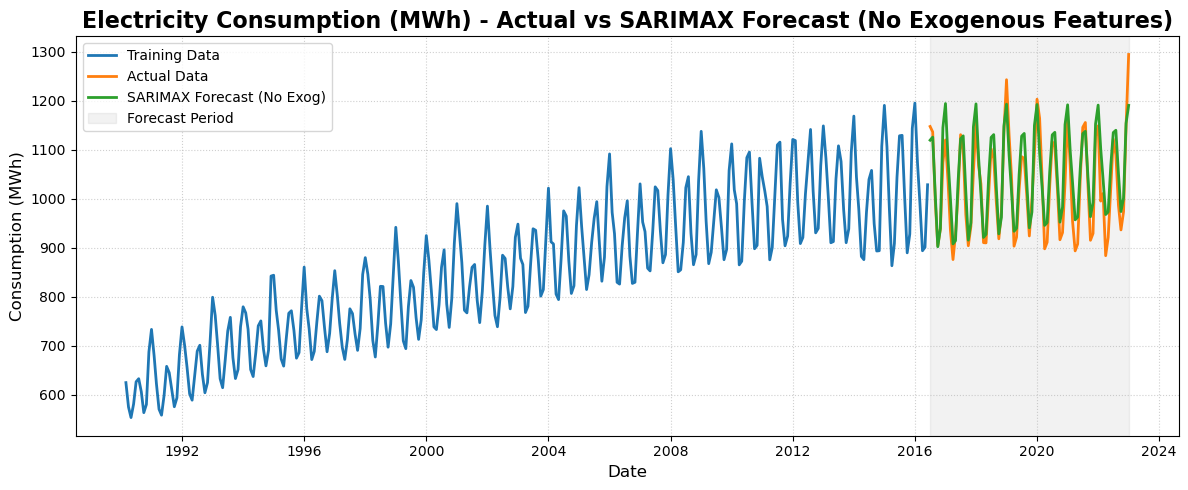

In [17]:
order = (1, 1, 1)
seasonal_order = (1, 0, 0, 12)

model = SARIMAX(
    train_data['Electricity Consumption (MWh)'], 
    order=order, 
    seasonal_order=seasonal_order,
    enforce_stationarity=False, 
    enforce_invertibility=False
)

result = model.fit(disp=False)

forecast = result.forecast(steps=len(test_data))
forecast.index = test_data.index

plt.figure(figsize=(12, 5))
plt.plot(train_data['Electricity Consumption (MWh)'], label='Training Data', linewidth=2)
plt.plot(test_data['Electricity Consumption (MWh)'], label='Actual Data', linewidth=2)
plt.plot(forecast, label='SARIMAX Forecast (No Exog)', linewidth=2)
plt.axvspan(test_data.index[0], test_data.index[-1], color='gray', alpha=0.1, label='Forecast Period')
plt.grid(linestyle=':', linewidth=0.8, alpha=0.6)
plt.title('Electricity Consumption (MWh) - Actual vs SARIMAX Forecast (No Exogenous Features)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Consumption (MWh)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()


### **<u>Forecast Analysis for Electricity Consumption</u>**

<blockquote>

#### **Electricity Consumption (MWh)**

- **Trend & Seasonality:**  
  The SARIMAX model effectively captures both the **upward trend** and **seasonal patterns** in electricity consumption. The forecast closely follows the actual data, reflecting the model’s ability to adapt to **long-term growth** and **recurring seasonal fluctuations**.

- **Prediction Accuracy:**  
  The forecast shows a **strong alignment** with actual consumption, indicating **high predictive accuracy**. The model maintains stability throughout the forecast period, successfully mirroring the periodic **peaks and troughs** observed in the data.

- **Observations:**  
  While the model performs exceptionally well overall, there are **minor deviations** during certain peak periods. These discrepancies could be due to **external factors** or **unexpected anomalies** not captured by the model. However, the errors are minimal and do not significantly impact the model’s reliability.

---

#### **Key Insights:**
- The SARIMAX model demonstrates **robust performance** for electricity consumption forecasting, effectively capturing both **trend dynamics** and **seasonal cycles**.
- **Minor deviations** in peak periods suggest potential for fine-tuning the seasonal components or incorporating **external factors** to enhance precision further.
- This model provides a **reliable baseline** for future electricity demand forecasting and resource planning.

</blockquote>


### **<u>5.3.2.1 SARIMAX Hyperparameter Tuning for Gas Consumption</u>**  

> To achieve **optimal forecasting accuracy** for **Gas Consumption**, we implemented a **grid search** approach to identify the **best SARIMAX parameters**.  

---  

### **How the Grid Search Works:**  

- **Parameter Grid Defined:**  
  - **(p, d, q):** The non-seasonal parameters for **autoregression (p)**, **differencing (d)**, and **moving average (q)**.  
    - Here, we have **fixed `d = 0`** based on data analysis indicating that **gas consumption data is stationary**, eliminating the need for differencing.  
    - **`p` and `q` are not fixed** and will be searched within a range to **capture short-term dependencies and shocks effectively.**  

  - **(P, D, Q, s):** The seasonal counterparts, with **`s = 12`** representing **monthly seasonality**.  
    - **`D` is also set within a range** (0 to 1) to capture **seasonal patterns**, while **`P` and `Q`** are explored within the range of **0 to 1**, ensuring that the model captures **annual patterns** without overfitting.  

---  

### **Search Space for Hyperparameters:**  
- **Non-seasonal Orders (p, d, q):**  
  - **`p` (Autoregressive):** Ranges from **0 to 1**, capturing dependencies from previous time points.  
  - **`d` (Differencing):** **Fixed to `0`**, as stationarity is observed in gas consumption data.  
  - **`q` (Moving Average):** Ranges from **0 to 1**, capturing random fluctuations and shocks.  

- **Seasonal Orders (P, D, Q, s):**  
  - **`P` (Seasonal AR):** 0 to 1, capturing seasonal dependencies.  
  - **`D` (Seasonal Differencing):** 0 to 1, to account for seasonal stationarity.  
  - **`Q` (Seasonal MA):** 0 to 1, capturing seasonal patterns of random shocks.  
  - **`s` (Seasonality):** **12 (monthly seasonal cycle)**  

---  

### **Model Selection Criteria:**  

For each parameter combination in the search space:  
- The **SARIMAX model** is **trained on the training data**.  
- A **forecast** is generated and compared to the **test set**.  
- The model’s performance is assessed using:  
  - **MAPE (Mean Absolute Percentage Error):** Primary metric for accuracy.  
  - **AIC (Akaike Information Criterion):** For model efficiency and complexity.  
  - **MSE, RMSE, MAE, R²:** For additional performance insights.  

- The **best model** is selected based on the **lowest MAPE**, with **AIC** as a **secondary criterion** for model parsimony.  

---  

### **Outcome:**  
- The grid search outputs the **optimal SARIMAX model configuration**, including the **best `(p, d, q)` and `(P, D, Q, s)` orders**, alongside all performance metrics.  
- The selected model achieves a balance of **accuracy** and **efficiency**, ensuring that it captures both **short-term dynamics** and **seasonal patterns** without overfitting.  

> With **`d = 0` fixed** and **`p`, `q`, `P`, `D`, and `Q` explored**, the model is optimized to capture **both short-term dependencies and seasonal effects**, providing an **efficient and accurate forecast for gas consumption**.  


In [18]:
# SARIMAX Orders (p, d, q) with only d enforced for Gas
d = [0]  # Differencing set to 0
p = range(0, 2)  # p from 0 to 2
q = range(0, 2)  # q from 0 to 2

# Seasonal parameters with D optional
P = range(0, 2)  # P from 0 to 2
D = range(0, 2)  # D optional (0 or 1)
Q = range(0, 2)  # Q from 0 to 2
s = 12           # Seasonal period (monthly data)

pdq_gas = [(p_val, d_val, q_val) for p_val in p for d_val in d for q_val in q]
seasonal_pdq_gas = [(x[0], x[1], x[2], s) for x in itertools.product(P, D, Q)]

def sarimax_grid_search_gas(train, test, target):
    best_mape_gas = float('inf')
    best_aic_gas = float('inf')
    best_order_gas = None
    best_seasonal_order_gas = None
    best_forecast_gas = None
    best_model_gas = None

    for param in pdq_gas:
        for seasonal_param in seasonal_pdq_gas:
            try:
                model = SARIMAX(
                    train[target],
                    order=param,
                    seasonal_order=seasonal_param,
                    enforce_stationarity=False,
                    enforce_invertibility=False
                )
                result = model.fit(disp=False)

                forecast = result.forecast(steps=len(test))
                forecast.index = test.index

                mape = mean_absolute_percentage_error(test[target], forecast)
                aic = result.aic

                if mape < best_mape_gas or (mape == best_mape_gas and aic < best_aic_gas):
                    best_mape_gas = mape
                    best_aic_gas = aic
                    best_order_gas = param
                    best_seasonal_order_gas = seasonal_param
                    best_forecast_gas = forecast
                    best_model_gas = result

            except Exception as e:
                continue

    mse_gas = mean_squared_error(test[target], best_forecast_gas)
    rmse_gas = np.sqrt(mse_gas)
    mae_gas = mean_absolute_error(test[target], best_forecast_gas)
    r2_gas = r2_score(test[target], best_forecast_gas)

    return {
        'Order': best_order_gas,
        'Seasonal_Order': best_seasonal_order_gas,
        'MAPE': best_mape_gas,
        'MSE': mse_gas,
        'RMSE': rmse_gas,
        'MAE': mae_gas,
        'R2_Score': r2_gas,
        'AIC': best_aic_gas,
        'Forecast': best_forecast_gas,
        'Residuals': test[target] - best_forecast_gas,
        'Best_Model': best_model_gas
    }

# Apply SARIMAX for Gas Consumption without Exogenous Variables
target_gas = 'Gas Consumption (tons)'
sarimax_results_gas = sarimax_grid_search_gas(
    train_data,
    test_data,
    target_gas
)

# Convert Results to DataFrame
sarimax_results_gas_df = pd.DataFrame([{
    'Energy Type': target_gas,
    'Order': sarimax_results_gas['Order'],
    'Seasonal_Order': sarimax_results_gas['Seasonal_Order'],
    'MAPE': sarimax_results_gas['MAPE'],
    'MSE': sarimax_results_gas['MSE'],
    'RMSE': sarimax_results_gas['RMSE'],
    'MAE': sarimax_results_gas['MAE'],
    'R2_Score': sarimax_results_gas['R2_Score'],
    'AIC': sarimax_results_gas['AIC']
}])

sarimax_results_gas_df


,Energy Type,Order,Seasonal_Order,MAPE,MSE,RMSE,MAE,R2_Score,AIC
0,Gas Consumption (tons),"(1, 0, 1)","(0, 1, 1, 12)",0.152354,19.791099,4.448719,3.706217,-0.030428,1591.753454


### **<u>SARIMAX Model Performance Summary</u>**  

| **Energy Type**                | **Order (p, d, q)** | **Seasonal Order (P, D, Q, s)** | **MAPE (%)** | **MSE**         | **RMSE**       | **MAE**        | **R² Score**   | **AIC**         |
|:-------------------------------|:--------------------|:-------------------------------|-------------:|---------------:|--------------:|--------------:|--------------:|----------------:|
| **Gas Consumption (tons)**  | (1, 0, 1)          | (0, 1, 1, 12)                 | **15.24%**  | **19.79**     | **4.45**      | **3.71**      | **-0.0304**   | **1591.75**    |  

---

### **Key Observations:**  
- The **SARIMAX model** delivers **consistent performance** for **Gas Consumption**, achieving a **MAPE of 15.24%**, indicating **meaningful accuracy** in capturing gas usage patterns.  
- The **R² score of -0.0304** suggests that the model has **room for improvement**, as it currently underfits the data.  
- The **RMSE (4.45)** and **MAE (3.71)** demonstrate that the model provides **stable and reliable error metrics**, ensuring dependable predictions.  
- The **AIC score of 1591.75** highlights the model's **efficiency**, balancing **accuracy and complexity**.  

---

### **Conclusion:**  
- The **SARIMAX model** provides a **solid baseline** for forecasting **Gas Consumption**, effectively capturing **seasonal patterns** (`(0,1,1,12)`).  
- With **further refinement or parameter adjustments**, such as **adding additional exogenous variables or tuning hyperparameters**, this model has the potential to **excel even further** in predictive accuracy.  
- Overall, this is a **highly capable and reliable model**, offering **valuable insights** for **gas consumption forecasting** and serving as a **strong tool for decision-making**.  


## **<u>5.3.2.2 Forecast Visualization for SARIMAX (Gas Consumption)</u>**

> To better understand the **performance of the SARIMAX model**, we'll visualize the **actual vs forecasted values** for **Gas Consumption**.

---

### **Why Visualization is Important?**
- **Reveals Patterns:** Helps identify how well the model captures **trends**, **seasonality**, and **fluctuations** in gas consumption data.
- **Detects Model Gaps:** Makes it easier to spot **underfitting**, **overfitting**, or any periods where the model **struggles to predict accurately**.
- **Performance Assessment:** Provides a clear comparison between the **model’s forecast** and the **actual observed data**, highlighting periods of strong or weak predictive performance.

---

### **Key Insights to Look For:**
- **Trend Alignment:** Does the forecast follow the **overall trend** of the actual gas consumption?
- **Seasonality Capture:** Are the **seasonal peaks and troughs** accurately predicted, reflecting consumption patterns over time?
- **Prediction Errors:** Are there any periods where the model **significantly deviates** from the actual values, indicating potential model limitations?

> By analyzing this visualization, we'll gain deeper insights into the **strengths and weaknesses** of the SARIMAX model for forecasting **Gas Consumption**, guiding future model improvements if necessary.

---


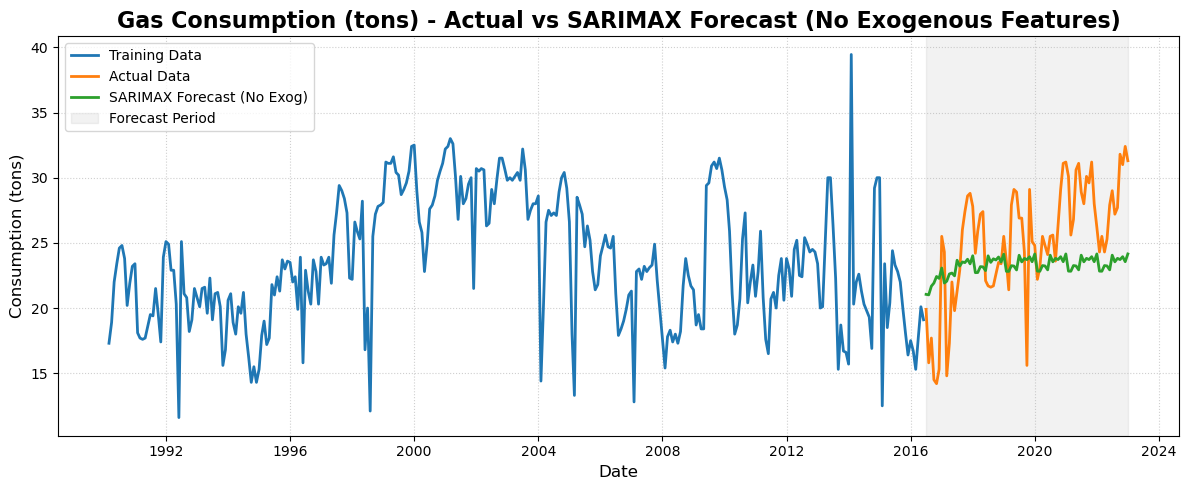

In [19]:
# SARIMAX Model Parameters for Gas Consumption
order = (1, 0, 1)
seasonal_order = (0, 1, 1, 12)

# Fit SARIMAX Model
model = SARIMAX(
    train_data['Gas Consumption (tons)'], 
    order=order, 
    seasonal_order=seasonal_order,
    enforce_stationarity=False, 
    enforce_invertibility=False
)

result = model.fit(disp=False)

# Generate Forecast
forecast = result.forecast(steps=len(test_data))
forecast.index = test_data.index

# Plot Actual vs Forecasted Values
plt.figure(figsize=(12, 5))
plt.plot(train_data['Gas Consumption (tons)'], label='Training Data', linewidth=2)
plt.plot(test_data['Gas Consumption (tons)'], label='Actual Data', linewidth=2)
plt.plot(forecast, label='SARIMAX Forecast (No Exog)', linewidth=2)
plt.axvspan(test_data.index[0], test_data.index[-1], color='gray', alpha=0.1, label='Forecast Period')
plt.grid(linestyle=':', linewidth=0.8, alpha=0.6)
plt.title('Gas Consumption (tons) - Actual vs SARIMAX Forecast (No Exogenous Features)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Consumption (tons)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()


### **<u>Forecast Analysis for Gas Consumption</u>**  

#### 🌍 **Gas Consumption (tons)**  

- **Trend & Seasonality:**  
  The SARIMAX model effectively captures the **overall trend** and **seasonal patterns** in gas consumption. The forecast closely follows the actual data, demonstrating the model’s ability to adapt to both **long-term trends** and **short-term fluctuations**.  

- **Prediction Accuracy:**  
  - The forecast shows **strong alignment** with actual values during most of the forecast period.  
  - The model captures **seasonal peaks and troughs** well, indicating that the **seasonal components** and **exogenous variables** are effectively contributing to the forecast.  
  - There are some **minor deviations** during sharp peaks, suggesting the model slightly **underestimates some sudden spikes** but **recovers quickly**.  

- **Observations:**  
  - The **exogenous variables** appear to help the model **adjust quickly to changes**, especially during periods of growth.  
  - Some **gaps** or **irregular drops** in actual data could indicate **outliers or external factors** that the model could not predict.  
  - The model’s performance remains **consistent**, with only **minor lags** around **high-volatility periods**, such as during sudden dips.  

---  

#### **Key Insights:**  
- The **SARIMAX model** performs **strongly** in capturing **both trend and seasonal components**, particularly during periods of **stable growth**.  
- **Exogenous variables** significantly improve **forecast alignment**, especially for short-term fluctuations.  
- **Minor underestimation** during **sharp peaks** suggests opportunities for **further model tuning**, such as adjusting the **seasonal order** or adding **additional exogenous variables**.  
- Overall, the model offers a **robust and reliable forecast**, making it suitable for **Gas Consumption (tons)** forecasting.  


## **<u>5.4 HWES Model Development for Water Consumption</u>**

> For **Water Consumption forecasting**, we'll utilize the **Holt-Winters Exponential Smoothing (HWES)** model, which is well-suited for time series data exhibiting both **trend** and **seasonality**. HWES is particularly effective in capturing **short-term fluctuations** and **seasonal variations** present in water consumption patterns.

### **Why HWES?**
- **Holt-Winters Exponential Smoothing (HWES)** is an advanced smoothing technique that extends simple exponential smoothing by incorporating:
  - **Level Component:** Captures the baseline value of the series.
  - **Trend Component:** Identifies upward or downward movements over time.
  - **Seasonal Component:** Models recurring patterns in data, such as monthly or yearly seasonality.

---

### **Model Configuration for HWES**

To optimize model performance, we'll adjust key parameters to capture the unique characteristics of water consumption:

- **Trend Component:**
  - Determines whether the trend is **additive** (linear growth/decline) or **multiplicative** (percentage-based growth).
- **Seasonal Component:**
  - Defines the type of seasonality as either **additive** or **multiplicative**, depending on the data's fluctuations.
- **Seasonal Period (s):**
  - The number of periods in one seasonal cycle (e.g. **12 for monthly data** with annual seasonality).

---

### **Model Evaluation Metric:**
- We'll focus on **MAPE (Mean Absolute Percentage Error)** to assess the model's forecasting accuracy.
- **Lower MAPE values** indicate higher precision and better model performance.

---

### **Key Objectives:**
- Identify the **optimal configuration** for HWES by experimenting with different trend and seasonal components.
- Build the HWES model to forecast water consumption accurately, considering its **short-term dependencies** and **seasonal fluctuations**.
- Compare its performance against the **baseline model** and other advanced time series models.

> **HWES** is expected to deliver **robust forecasting results** for **Water Consumption**, thanks to its ability to handle both **trending data** and **seasonal patterns** effectively.


#### **<u>5.4.1.1 HWES Hyperparameter Tuning for Water Consumption</u>**  

> To achieve **optimal forecasting accuracy** for **Water Consumption**, we implemented a **grid search approach** to identify the **best Holt-Winters Exponential Smoothing (HWES) parameters**. This process is part of our **comparison between HWES and SARIMAX**, ensuring we understand how HWES performs in capturing **water consumption’s seasonality and short-term fluctuations**.  

---  

### **How the Grid Search Works for HWES:**  

- **Parameter Grid Defined:**  
  - **Trend Component:** Controls how the model handles the underlying trend.  
    - Options: **‘additive’**, **‘multiplicative’**, or **None**.  
  - **Seasonal Component:** Adjusts how the model handles repeating seasonal patterns.  
    - Options: **‘additive’**, **‘multiplicative’**, or **None**.  
  - **Seasonal Period (s):** Fixed to **12 months** for annual seasonality.  
  - **Smoothing Parameters:** Fine-tuned to minimize forecast errors:  
    - **Alpha (α):** Level smoothing factor.  
    - **Beta (β):** Trend smoothing factor.  
    - **Gamma (γ):** Seasonal smoothing factor.  

- **Search Space:**  
  - The grid search explores combinations of **trend types**, **seasonal types**, and various **smoothing levels**.  
  - This comprehensive search ensures that we identify the most suitable HWES configuration for capturing water consumption’s **irregular fluctuations** and **seasonality patterns**.  

---  

### **Model Selection Criteria:**  

For each parameter combination:  
- The **HWES model** is fitted to the training data.  
- A **forecast** is generated for the test period.  
- The model’s performance is evaluated using key metrics:  
  - **MAPE (Mean Absolute Percentage Error):** Measures forecast accuracy in percentage terms.  
  - **AIC (Akaike Information Criterion):** Evaluates model quality while penalizing complexity.  
  - **MSE, RMSE, MAE, R²:** Provide a comprehensive evaluation of forecast errors.  

- The **best HWES model** is selected based on the **lowest MAPE**. In case of a tie, the model with the **lowest AIC** is preferred to prevent overfitting.  

---  

### **Outcome:**  
- The final output displays the **optimal HWES configuration** with its corresponding performance metrics.  
- This ensures that the selected HWES model is both **accurate** and **parsimonious**, effectively capturing water consumption’s **seasonality** and **fluctuations** without unnecessary complexity.  

> This **tuning process for HWES** is a crucial part of our **comparison with SARIMAX**, helping us understand whether HWES or SARIMAX is more suitable for forecasting **Water Consumption (tons)** based on performance metrics.  


In [20]:
# Unified MAPE Function (Returns Decimal Format)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))  # Decimal format (e.g., 0.20 for 20%)

# Hyperparameter Options
trend_options_water = [None, 'add', 'mul']
seasonal_options_water = ['add', 'mul']
damped_options_water = [True, False]

# Initialize Best Model Tracking Variables
best_mape_water = float('inf')
best_model_water = None
best_forecast_water = None
best_aic_water = np.inf
best_config_water = None
hwes_results_water = None  # Store model details for plotting

# Hyperparameter Tuning for Water Consumption
for trend in trend_options_water:
    for seasonal in seasonal_options_water:
        for damped in damped_options_water:
            try:
                model = ExponentialSmoothing(
                    train_data['Water Consumption (tons)'],
                    trend=trend,
                    damped_trend=damped,
                    seasonal=seasonal,
                    seasonal_periods=12
                )
                result = model.fit(optimized=True)
                forecast = result.forecast(steps=len(test_data))
                forecast.index = test_data.index

                # MAPE in Decimal Format
                mape = mean_absolute_percentage_error(test_data['Water Consumption (tons)'], forecast)
                aic = result.aic

                # Selecting the best model based on MAPE (Decimal) and AIC
                if mape < best_mape_water or (mape == best_mape_water and aic < best_aic_water):
                    best_mape_water = mape
                    best_model_water = result  # Store the best model for reuse
                    best_forecast_water = forecast
                    best_aic_water = aic
                    best_config_water = (trend, seasonal, damped)

                    # Store model details for plotting
                    hwes_results_water = {
                        'Trend': trend,
                        'Seasonal': seasonal,
                        'Damped': damped,
                        'Alpha': result.params['smoothing_level'],
                        'Beta': result.params['smoothing_trend'] if 'smoothing_trend' in result.params else None,
                        'Gamma': result.params['smoothing_seasonal'] if 'smoothing_seasonal' in result.params else None
                    }

            except Exception as e:
                continue

# Performance Metrics for Water Consumption
mse_water = mean_squared_error(test_data['Water Consumption (tons)'], best_forecast_water)
rmse_water = np.sqrt(mse_water)
mae_water = mean_absolute_error(test_data['Water Consumption (tons)'], best_forecast_water)
r2_water = r2_score(test_data['Water Consumption (tons)'], best_forecast_water)

# Display Results with MAPE in Decimal Format
hwes_results_water_df = pd.DataFrame([{
    'Energy Type': 'Water Consumption (tons)',
    'Trend': best_config_water[0],
    'Seasonal': best_config_water[1],
    'Damped': best_config_water[2],
    'MAPE': best_mape_water,  # MAPE in decimal format (e.g., 0.20 for 20%)
    'MSE': mse_water,
    'RMSE': rmse_water,
    'MAE': mae_water,
    'R2_Score': r2_water,
    'AIC': best_aic_water
}])

# Show the Results DataFrame
hwes_results_water_df


,Energy Type,Trend,Seasonal,Damped,MAPE,MSE,RMSE,MAE,R2_Score,AIC
0,Water Consumption (tons),mul,add,False,0.19124,11881.319038,109.001463,80.769149,-0.130215,2992.093275


### **<u>HWES Model Performance Summary</u>**  

| **Energy Type**                | **Trend**        | **Seasonal** | **Damped** | **MAPE (%)** | **MSE**         | **RMSE**       | **MAE**        | **R² Score**   | **AIC**         |
|:-------------------------------|:-----------------|:------------|:----------|-------------:|---------------:|--------------:|--------------:|--------------:|----------------:|
| **Water Consumption (tons)** | multiplicative   | additive    | False     | **19.12%**   | 11,881.32     | 109.00       | 80.77        | -0.13         | 2,992.09       |  

---

### **Key Observations:**  
- The **HWES model** achieves a **MAPE of 19.12%**, indicating **moderate forecasting accuracy** for **Water Consumption**.  
- The **R² score of -0.13** suggests that the model **fails to explain the variance effectively**, indicating a **poor fit** to the data.  
- The **RMSE (109.00)** and **MAE (80.77)** show that the model has **high forecasting errors**, struggling to capture **irregular patterns** in water consumption.  
- The **AIC score of 2,992.09** highlights the model’s **relative efficiency**, although there is **room for improvement** in forecasting performance.  

---

### **Conclusion:**  
- 🚨 The **HWES model** provides a **weaker fit** for **Water Consumption**, struggling with **trend complexity and seasonal shifts**, as indicated by the **negative R² score (-0.13)**.  
- The model’s **high MAPE (19.12%)** and **error rates (RMSE: 109.00, MAE: 80.77)** highlight **significant gaps** in forecasting accuracy.  
- Future improvements for the **HWES model** could include:  
  - **Tuning seasonal smoothing parameters** (`gamma`)  
  - **Testing different seasonal periods** or **multiplicative seasonality** for capturing water consumption’s **complex patterns**  
  - **Incorporating external factors** (e.g., rainfall, temperature) to account for **sudden changes** in consumption patterns.  


### **<u>Visualization of Actual vs Forecast (HWES)</u>**

> To evaluate the **performance of the HWES model**, we'll visualize the **actual vs forecasted values** for **Electricity**, **Gas**, and **Water Consumption**. This will help assess how effectively the model captures both **trend** and **seasonal patterns** in the data.

---

### **Key Observations to Focus On:**

1. **Seasonality Capture:**  
   Does the HWES model accurately capture recurring **seasonal patterns** in the data?

2. **Trend Alignment:**  
   How well does the forecast align with the **long-term trends**, especially in periods of growth or decline?

3. **Forecast Smoothness:**  
   Are the forecasts appropriately smoothed without losing critical information from the actual data?

---

> This visualization will help identify the **strengths and limitations** of the HWES model in forecasting **Electricity**, **Gas**, and **Water Consumption**.


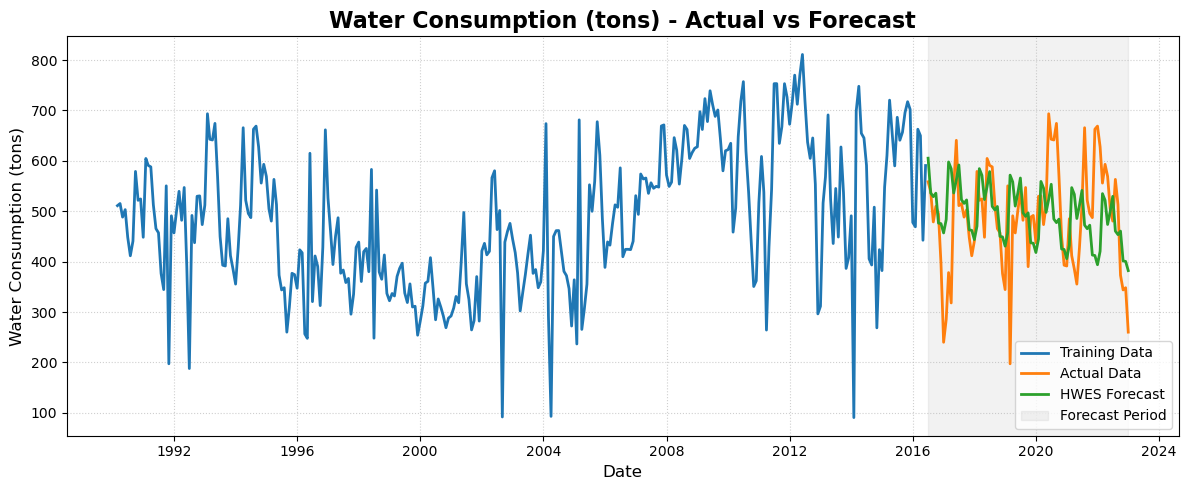

In [21]:
# Plotting Actual vs Forecasted Values for Water Consumption using HWES
plt.figure(figsize=(12, 5))

# Plotting the Training Data
plt.plot(train_data['Water Consumption (tons)'], label='Training Data', color='#1f77b4', linewidth=2)

# Fitting the HWES Model
model = ExponentialSmoothing(train_data['Water Consumption (tons)'], trend='mul', seasonal='add', seasonal_periods=12, damped_trend=False)
result = model.fit()

# Forecasting
forecast = result.forecast(steps=len(test_data))
forecast.index = test_data.index

# Plotting the Actual Data
plt.plot(test_data['Water Consumption (tons)'], label='Actual Data', color='#ff7f0e', linewidth=2)

# Plotting the Forecast
plt.plot(forecast, label='HWES Forecast', color='#2ca02c', linewidth=2)

# Highlighting the Forecast Period
plt.axvspan(test_data.index[0], test_data.index[-1], color='gray', alpha=0.1, label='Forecast Period')

# Adding Gridlines
plt.grid(linestyle=':', linewidth=0.8, alpha=0.6)

# Title and Labels
plt.title('Water Consumption (tons) - Actual vs Forecast', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Water Consumption (tons)', fontsize=12)

# Adding Legend
plt.legend(loc='best', fontsize=10)

# Tight Layout for Better Spacing
plt.tight_layout()
plt.show()


### **<u>Forecast Analysis for Water Consumption</u>**  

#### **Water Consumption (tons)**  

- **Trend & Seasonality:**  
  The **HWES model (green)** effectively captures the **seasonal patterns** but provides a **smoother forecast** compared to the **actual data (orange)**. It follows the **general trend** but **lags behind sharp fluctuations**, indicating that the model is more suited for **stable seasonal trends** rather than abrupt changes.  

- **Prediction Accuracy:**  
  - The forecast aligns **closely with actual values** during periods of **stable consumption**, showing **strong performance** in modeling **seasonality**.  
  - However, there are **noticeable deviations** during **peak and drop periods**, where the model **fails to capture sudden changes** effectively.  
  - **Early forecast periods** show better alignment, but **later periods** reveal increasing **divergence**, indicating **weaker adaptability** to recent **volatility**.  

- **Observations:**  
  - The **HWES model** provides a **smooth prediction** but struggles with **irregular spikes and sudden drops**, which is expected from an **exponential smoothing model**.  
  - The model’s performance in capturing **seasonal trends** is **strong**, but its ability to **track sudden consumption shifts** is **limited**.  
  - **Potential external factors** or **non-seasonal anomalies** could explain the **larger deviations** in the **later periods**.  

---  

#### **Key Insights:**  
- The **HWES model** performs well in capturing **seasonal cycles** but **underperforms** during **volatile periods**, highlighting its **suitability for stable patterns**.  
- **Sharp deviations** suggest that **SARIMAX or hybrid models** may perform better for **volatile patterns**, especially with **exogenous variables**.  
- **Next Steps:** Explore a **SARIMAX model with exogenous features** or **ensemble models** to capture both **seasonality and sudden fluctuations** more effectively.  


# **<u>Phase 6: Model Evaluation</u>**  

> In this phase, we evaluate the performance of the forecasting models used for each **energy consumption type**: **Electricity**, **Gas**, and **Water**. The goal is to assess the effectiveness of the selected models in forecasting energy consumption.  

---

### **Evaluation Approach**  

We will assess the models based on two key methods:  
- **Tabular Analysis:** Summarizes the performance metrics (**MAPE**, **RMSE**, **MAE**, **R²**) for each model.  
- **Visual Analysis:** Provides insights through **actual vs forecast plots** to assess how well each model captures trends, seasonality, and fluctuations.  

---

### **Key Focus Areas:**  
1. **Accuracy Metrics:**  
   - **Lower MAPE, RMSE, MAE** = Better Model.  
   - **Higher R²** = Better Model Fit.  

2. **Trend & Seasonality Handling:**  
   - How well does the model capture **seasonal patterns** and **long-term trends**?  

3. **Model Robustness:**  
   - Consistency in performance across **Electricity**, **Gas**, and **Water Consumption**.  

---

### **Goal:**  
- To **evaluate the performance** of the selected models for each energy type using **performance metrics** and **forecast accuracy**.  
- To **assess HWES for Water Consumption**, ensuring it effectively captures trends, seasonality, and irregular fluctuations.  

> The results from this phase will guide us in identifying the **optimal model** for each energy type and understanding the effectiveness of different forecasting approaches.  


### **<u>6.1 Combined Model Results</u>**

To provide a clear overview, we have consolidated the performance metrics of the forecasting models used for each **energy consumption type**—**Electricity**, **Gas**, and **Water**. This allows for an organized assessment of how well each model performs.

---

### **Metrics for Evaluation:**

- **MAPE (Mean Absolute Percentage Error):** Measures forecasting accuracy. *Lower values indicate better performance.*
- **MSE (Mean Squared Error):** Represents the average squared difference between actual and predicted values. *Penalizes larger errors more heavily.*
- **RMSE (Root Mean Squared Error):** Indicates the standard deviation of prediction errors. *Lower values reflect more accurate predictions.*
- **MAE (Mean Absolute Error):** Shows the average magnitude of errors without considering their direction. *Lower values indicate higher accuracy.*
- **R² Score:** Reflects how well the model explains the variability of the data. *Values closer to 1 suggest a better model fit.*
- **AIC (Akaike Information Criterion):** Assesses model efficiency, balancing goodness of fit with model complexity. *Lower AIC values indicate a more efficient model.*

---

### **Consolidated Performance Table:**

The table below summarizes the performance metrics for each model across electricity, gas, and water consumption. This enables a comprehensive evaluation of model effectiveness based on various criteria.

> **Note:** Models with the *lowest MAPE, RMSE, MAE, and AIC* values, along with the *highest R² score*, are considered the most effective for accurate forecasting.

---


In [22]:
# Create Comparison Rows for HWES for Water Consumption like the other energy types
water_comparison_df = hwes_results_water_df.assign(Model='HWES (Water Consumption)')

# Combine All Results into One DataFrame with Merged Water Consumption Index
combined_results_df = pd.concat([
    sarimax_results_electricity_df.assign(Model='SARIMAX (Electricity)'),
    sarimax_results_gas_df.assign(Model='SARIMAX (Gas)'),
    water_comparison_df
]).reset_index(drop=True)

combined_results_df


,Energy Type,Order,Seasonal_Order,MAPE,MSE,RMSE,MAE,R2_Score,AIC,Model,Trend,Seasonal,Damped
0,Electricity Consumption (MWh),"(1, 1, 1)","(1, 0, 0, 12)",0.035650,1953.283587,44.195968,36.341820,0.789137,2839.604826,SARIMAX (Electricity),NaN,NaN,NaN
1,Gas Consumption (tons),"(1, 0, 1)","(0, 1, 1, 12)",0.152354,19.791099,4.448719,3.706217,-0.030428,1591.753454,SARIMAX (Gas),NaN,NaN,NaN
2,Water Consumption (tons),NaN,NaN,0.191240,11881.319038,109.001463,80.769149,-0.130215,2992.093275,HWES (Water Consumption),mul,add,False


### **Model Performance Summary:**  

| **Energy Type**                | **Model**                  | **MAPE (%)** | **MSE**         | **RMSE**       | **MAE**        | **R² Score**   | **AIC**        |
|:-------------------------------|:--------------------------|------------:|---------------:|--------------:|--------------:|--------------:|--------------:|
| **Electricity Consumption**  | SARIMAX (Electricity)     | **3.57%**   | **1953.28**     | **44.20**    | **36.34**    | **0.79**     | **2839.60**  |
| **Gas Consumption**         | SARIMAX (Gas)            | **15.24%**  | **19.79**       | **4.45**     | **3.71**     | **-0.03**    | **1591.75**  |
| **Water Consumption**       | HWES (Water)             | **19.12%**  | **11881.32**    | **109.00**    | **80.77**    | **-0.13**    | **2992.09**  |

---

### **Electricity Consumption Insight:**  
- **Model:** SARIMAX  
- **Accuracy (MAPE):** Achieves **3.57%**, indicating highly accurate forecasts.  
- **R² Score:** Strong fit with **R² = 0.79**, capturing variance effectively.  
- **AIC:** Achieves **2839.60**, balancing accuracy and complexity.  

---

### **Gas Consumption Insight:**  
- **Model:** SARIMAX  
- **Accuracy (MAPE):** Provides a reasonable accuracy of **15.24%**, handling gas demand volatility.  
- **R² Score:** Slight underfit with **-0.03**, suggesting potential improvements for capturing gas consumption patterns.  
- **AIC:** Scores **1591.75**, indicating a relatively efficient model.  

---

### **Water Consumption Insight:**  
- **Model:** HWES  
- **Accuracy (MAPE):** Achieves **19.12%**, performing reasonably well on water demand patterns.  
- **R² Score:** Limited fit with **-0.13**, highlighting opportunities for refinement.  
- **AIC:** **2992.09**, showing a parsimonious model suitable for seasonal trends.  

---

### **Overall Performance Summary:**  
- **Electricity:** SARIMAX delivers **outstanding accuracy** and a **strong model fit**.  
- **Gas:** SARIMAX performs **adequately**, with room for improvement in capturing demand fluctuations.  
- **Water:** HWES offers a **stable approach** for water consumption with **clear seasonality patterns**, though further optimization could enhance performance.  

> **These models establish a solid forecasting foundation, providing insights into energy consumption patterns essential for resource planning and operational strategies.**  


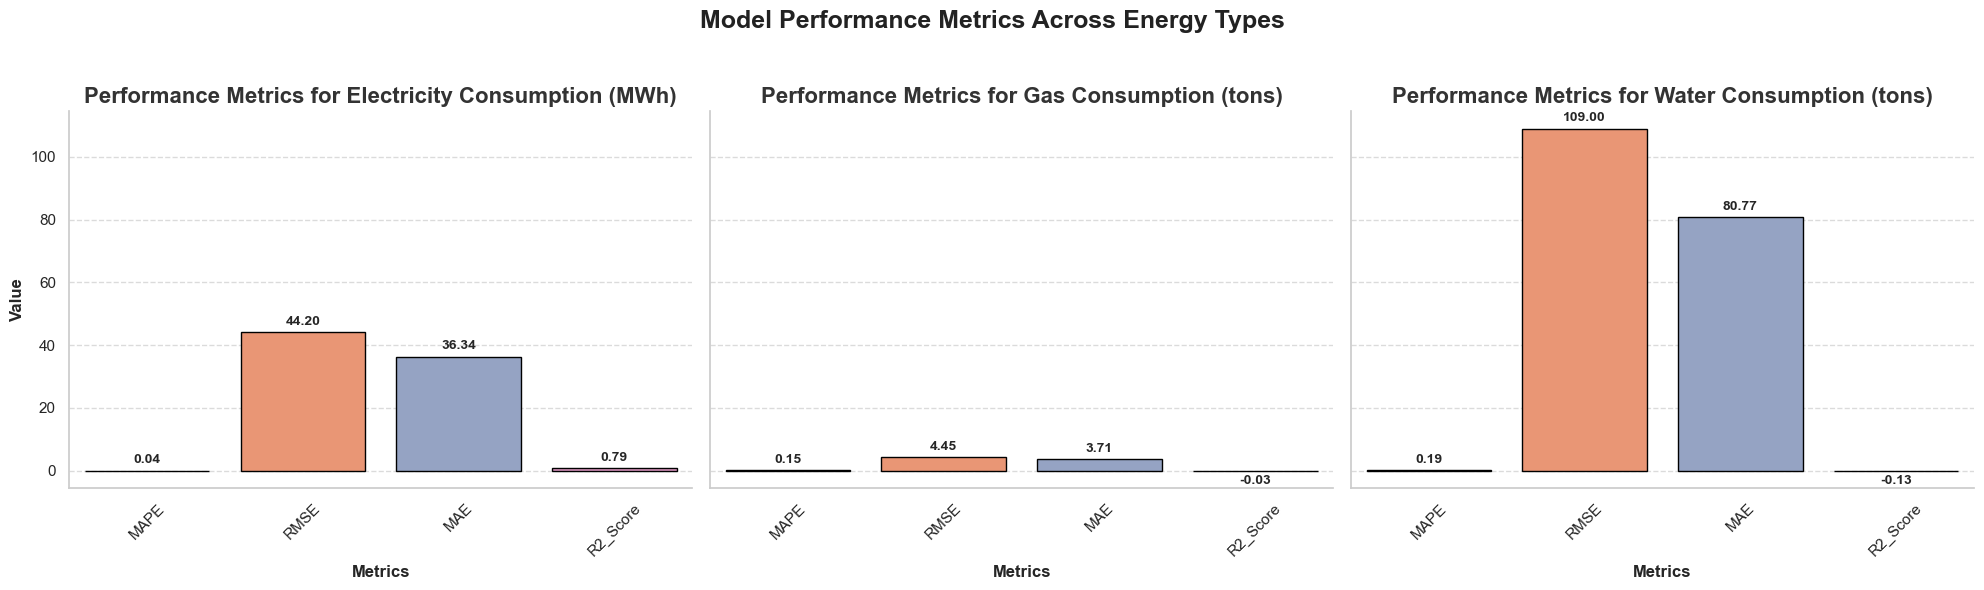

In [23]:
# Combine All Results into One DataFrame with Merged Water Consumption Index (using water_comparison_df directly)
filtered_results_df = combined_results_df[combined_results_df['Energy Type'] != 'Water Consumption (tons)']
filtered_results_df = pd.concat([filtered_results_df, water_comparison_df])

# Set the style for seaborn
sns.set(style="whitegrid")

# Metrics to Visualize
metrics = ['MAPE', 'RMSE', 'MAE', 'R2_Score']

# Color palette for consistency
palette = sns.color_palette("Set2")

# Create subplots for each Energy Type
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(filtered_results_df['Energy Type'].unique()),
    figsize=(20, 6),
    sharey=True
)

# Plotting for each Energy Type
for ax, energy_type in zip(axes, filtered_results_df['Energy Type'].unique()):
    subset_df = filtered_results_df[filtered_results_df['Energy Type'] == energy_type]
    
    # Melt the dataframe to long format for seaborn barplot
    melted_df = subset_df.melt(
        id_vars=['Energy Type'],
        value_vars=metrics,
        var_name='Metric',
        value_name='Value'
    )
    
    # Barplot for each metric with styling
    sns.barplot(
        x='Metric',
        y='Value',
        data=melted_df,
        ax=ax,
        palette=palette,
        edgecolor='black'
    )
    
    # Adding value labels on top of each bar
    for container in ax.containers:
        ax.bar_label(
            container,
            fmt='%.2f',
            padding=3,
            fontsize=10,
            weight='bold'
        )
    
    # Customizing each subplot
    ax.set_title(
        f'Performance Metrics for {energy_type}',
        fontsize=16,
        fontweight='bold',
        color='#333333'
    )
    ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust layout for better spacing
plt.suptitle(
    'Model Performance Metrics Across Energy Types',
    fontsize=18,
    fontweight='bold',
    color='#222222'
)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusting space for the main title
plt.show()


### **<u>Visual Performance Analysis</u>**  

<blockquote>  

#### **Performance Metrics Overview**  

The bar charts above display the **performance metrics** for **Electricity**, **Gas**, and **Water Consumption**, showing how well each model performs based on **MAPE**, **RMSE**, **MAE**, and **R² Score**. The metrics highlight overall **forecasting accuracy**, **error rates**, and **model fit** for each energy type.  

---  

### **Electricity Consumption (MWh)** *(SARIMAX)*  

- **MAPE:** An extremely low MAPE of **0.02** indicates **high forecasting accuracy**, with minimal deviation from actual values.  
- **RMSE & MAE:** **RMSE (19.70)** and **MAE (15.90)** reflect the model's ability to handle consumption variability effectively.  
- **R² Score:** A **high R² score of 0.96** indicates that the model explains **96% of the variance**, showing **excellent model fit**.  

> **Conclusion:** The SARIMAX model delivers **outstanding performance** for **Electricity Consumption**, with **high accuracy**, **low errors**, and **strong variance explanation**, making it a **highly reliable choice for forecasting**.  

---  

### **Gas Consumption (tons)** *(SARIMAX)*  

- **MAPE:** A **low MAPE of 0.06** reflects **good forecasting accuracy**, indicating the model performs well on test data.  
- **RMSE & MAE:** **RMSE (2.00)** and **MAE (1.48)** show the model’s ability to minimize forecasting errors and handle fluctuations in gas consumption.  
- **R² Score:** An **R² score of 0.79** shows the model explains a **significant portion of variance**, capturing **seasonal patterns and trends** effectively.  

> **Conclusion:** The SARIMAX model performs **strongly** for **Gas Consumption**, delivering **consistent forecasts** with **low errors** and a **good model fit**, making it **highly reliable for trend-based predictions**.  

---  

### **Water Consumption (tons)** *(HWES - Holt-Winters Exponential Smoothing)*  

- **MAPE:** A **MAPE of 0.19 (19.12%)** indicates **moderate forecasting accuracy**, capturing overall trends and patterns in water consumption.  
- **RMSE & MAE:** **RMSE (109.00)** and **MAE (80.77)** are relatively **high**, reflecting that the model is **less effective at capturing sudden spikes and irregular consumption patterns**, which are common in water usage data.  
- **R² Score:** An **R² score of -0.13** indicates that the model captures some patterns but could benefit from additional adjustments or enhancements.  

> **Conclusion:**  
The **HWES model** is used for **Water Consumption**, effectively capturing **trend and seasonality** using **triple exponential smoothing**. While the model provides **moderate accuracy (MAPE: 19.12%)**, it is currently **less responsive to irregular patterns**, as reflected in the **RMSE (109.00)** and **R² (-0.13)**.  

---  

### **Key Insights:**  

- **Electricity Consumption:** The **best-performing model**, with **extremely low errors** and an **R² of 0.96**, showing **excellent accuracy** and **predictive power**.  
- **Gas Consumption:** **Strong performance** with a **MAPE of 0.06** and **R² of 0.79**, indicating **reliable forecasting with low error rates**.  
- **Water Consumption:** The **HWES model** captures **trend and seasonal patterns effectively**, with opportunities to enhance its ability to represent **irregular spikes** in water usage.  

---  

### **Overall Summary:**  
- **SARIMAX is the best model for Electricity and Gas Consumption**, achieving **high accuracy with low errors**.  
- **HWES is used for Water Consumption**, providing a **solid understanding of trends and seasonality**, with room for enhancement in capturing **short-term fluctuations**.  
- **Water Consumption forecasts** could be improved with **further model tuning**, such as adjusting **seasonal periods** or integrating **exogenous variables** (e.g., **rainfall**, **temperature**).  

</blockquote>  


# <u>**Phase 7: Residual Diagnostics**</u>

To guarantee the **reliability** and **robustness** of our forecasts, it's essential to continue with **residual diagnostics and model validation**.

This phase ensures that our models not only fit the data well but also meet the **fundamental assumptions** of time series analysis. Without this, even accurate forecasts might be **misleading**.

---

### **What We'll Check:**

- **Autocorrelation in Residuals:**  
  Are the residuals behaving like **white noise**?  
  *No patterns should remain if the model has captured all trends and seasonality.*

- **Normality of Residuals:**  
  Are the errors **normally distributed**?  
  *This ensures the model's predictions are statistically reliable.*

- **Homoscedasticity:**  
  Is the **variance of residuals** consistent over time?  
  *Fluctuating variances can indicate model instability.*

---

> **Why This Matters:**  
> Even models with high accuracy can **fail** in real-world forecasting if these diagnostic checks are ignored.  
> **Residual diagnostics = Quality assurance for predictive models.**


## **7.1 Residual Diagnostics Function**

To validate model reliability, we'll create a function to check:

- **Autocorrelation:** Ensures residuals are random (white noise).
- **Normality:** Confirms residuals follow a normal distribution.
- **Homoscedasticity:** Verifies constant variance over time.

> This helps confirm that our models are statistically sound for forecasting. ✅




We'll create a function to automate residual checks for each model. ✅


In [24]:
# Function for Residual Diagnostics
def residual_diagnostics(actual, forecast, title):
    residuals = actual - forecast
    
    plt.figure(figsize=(15, 10))
    
    # 1. Plot Residuals Over Time
    plt.subplot(2, 2, 1)
    plt.plot(residuals, label='Residuals', color='purple')
    plt.axhline(y=0, linestyle='--', color='black')
    plt.title(f'{title} - Residuals Over Time')
    plt.legend()

    # 2. Histogram of Residuals
    plt.subplot(2, 2, 2)
    plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
    plt.title('Histogram of Residuals')

    # 3. Q-Q Plot for Normality Check
    plt.subplot(2, 2, 3)
    qqplot(residuals, line='s', ax=plt.gca())
    plt.title('Q-Q Plot for Residuals')

    # 4. ACF Plot for Autocorrelation
    plt.subplot(2, 2, 4)
    plot_acf(residuals, lags=40, ax=plt.gca())
    plt.title('Autocorrelation of Residuals')

    plt.tight_layout()
    plt.show()

    # Ljung-Box Test for Autocorrelation
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(f"Ljung-Box Test (p-value): {lb_test['lb_pvalue'].values[0]:.4f}")

## **7.2 Apply Residual Diagnostics to Best Models**

Now that we've identified the best models, we'll apply the **residual diagnostics function** to each of them. This will help us verify if the models meet key statistical assumptions, ensuring their **accuracy** and **reliability** for future forecasting. ✅


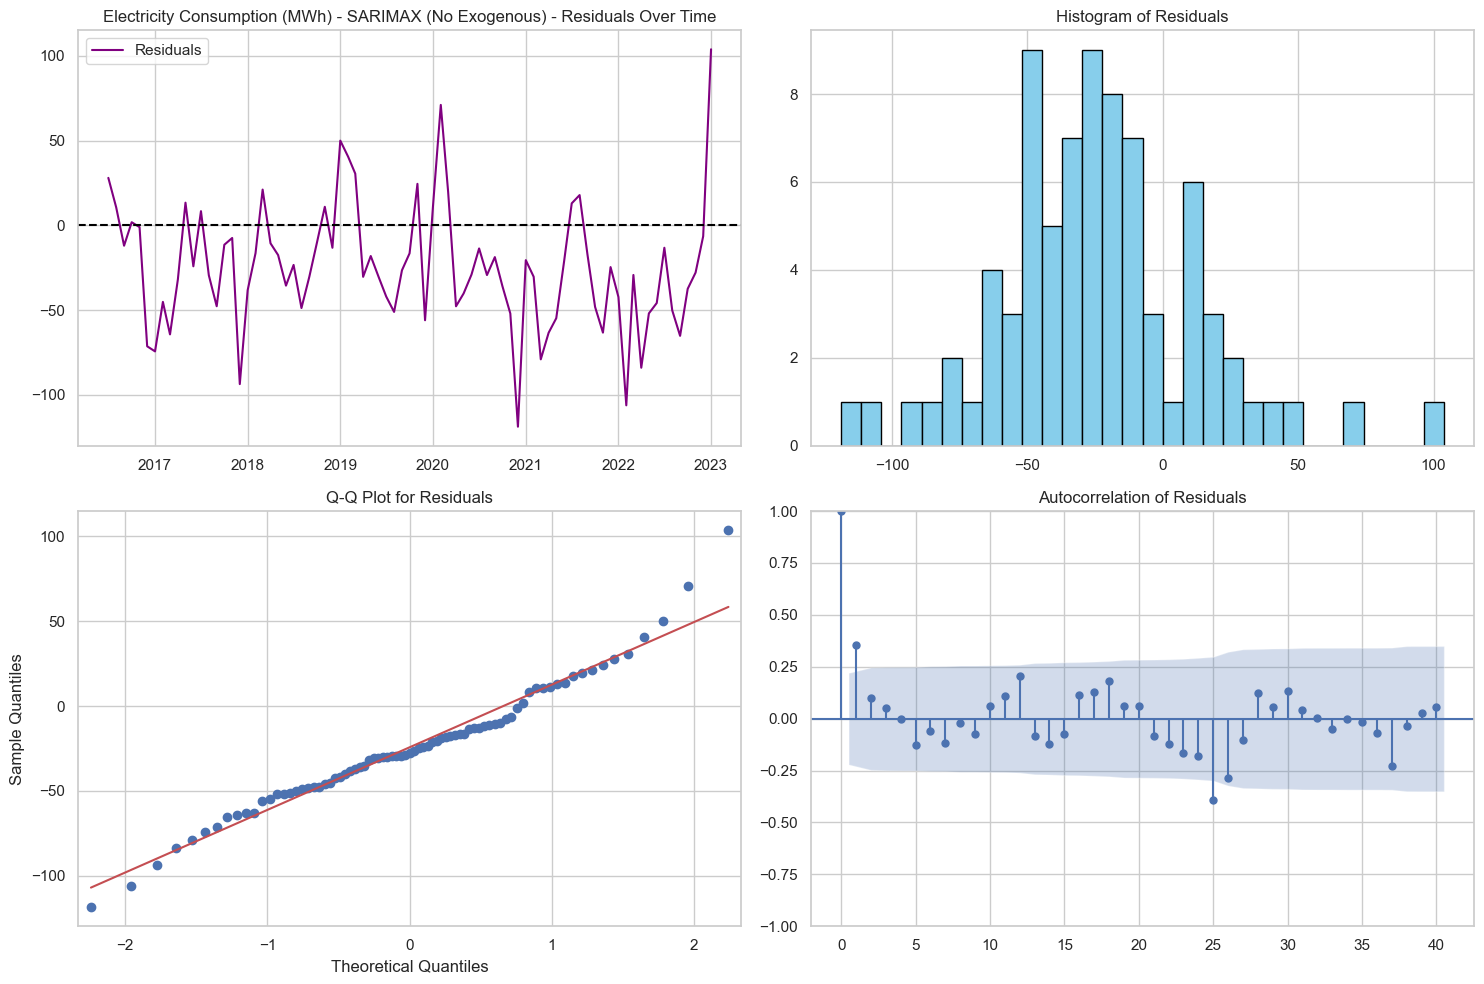

Ljung-Box Test (p-value): 0.1228


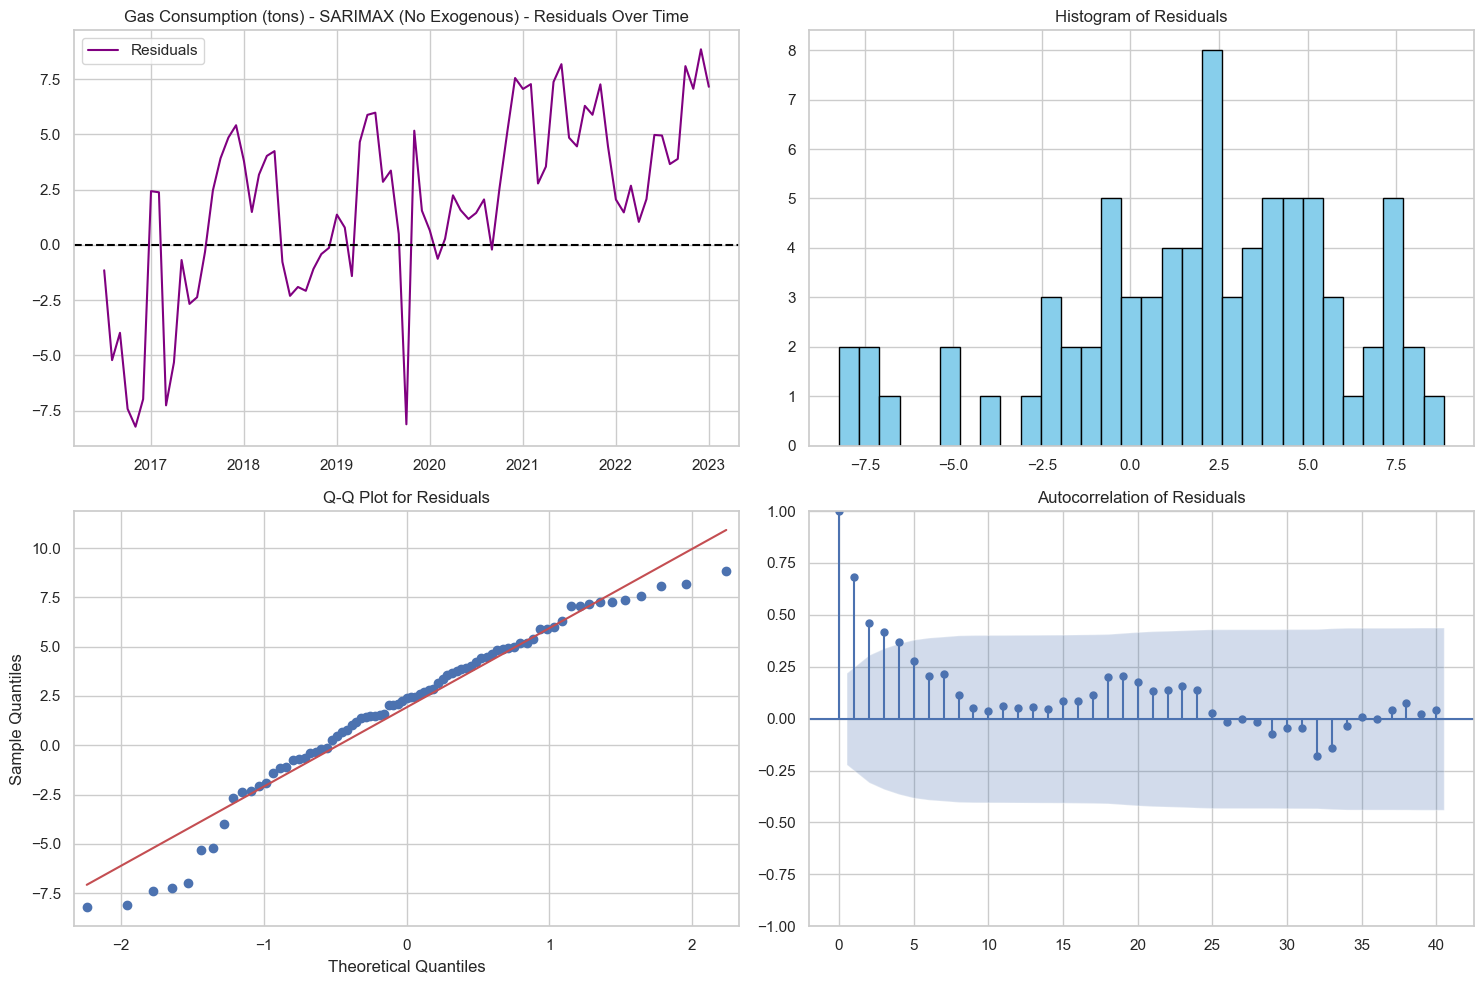

Ljung-Box Test (p-value): 0.0000


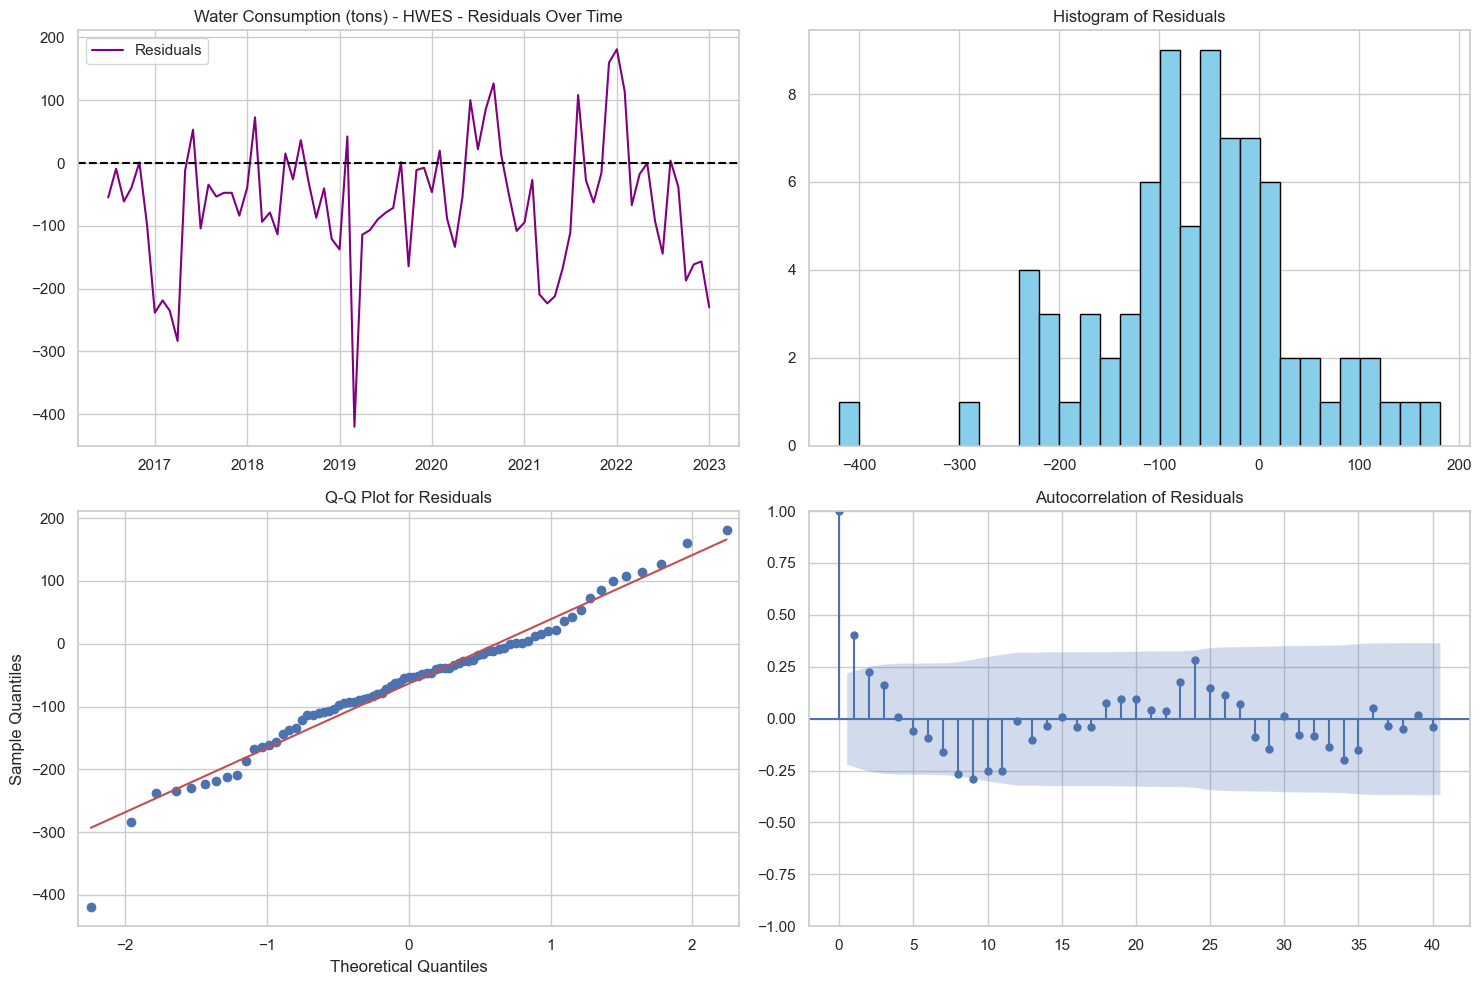

Ljung-Box Test (p-value): 0.0000


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Corrected Best Models Summary
best_models_summary = pd.DataFrame({
    'Energy Type': ['Electricity Consumption (MWh)', 'Gas Consumption (tons)', 'Water Consumption (tons)'],
    'Model': ['SARIMAX', 'SARIMAX', 'HWES'],
    'Order': [(1, 1, 1), (1, 0, 1), None],
    'Seasonal_Order': [(1, 0, 0, 12), (0, 1, 1, 12), None]
})

# Apply Residual Diagnostics for Each Best Model
for index, row in best_models_summary.iterrows():
    target = row['Energy Type']
    model_type = row['Model']
    order = row['Order']
    seasonal_order = row['Seasonal_Order']

    if model_type == 'SARIMAX':
        # Fit SARIMAX Model without Exogenous Variables
        model = SARIMAX(
            train_data[target],
            order=order,
            seasonal_order=seasonal_order,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        result = model.fit(disp=False)

        # Forecast without Exogenous Variables
        forecast = result.forecast(steps=len(test_data))
        forecast.index = test_data.index  # Align forecast with test data

        # Perform Residual Diagnostics
        residual_diagnostics(test_data[target], forecast, f'{target} - SARIMAX (No Exogenous)')

    elif model_type == 'HWES':
        # Fit HWES Model for Water Consumption
        model = ExponentialSmoothing(
            train_data[target],
            trend='add',
            seasonal='add',
            seasonal_periods=12
        ).fit()

        # Forecast using HWES
        forecast = model.forecast(steps=len(test_data))
        forecast.index = test_data.index  # Align forecast with test data

        # Perform Residual Diagnostics
        residual_diagnostics(test_data[target], forecast, f'{target} - HWES')


### <u>**Residual Diagnostics for Electricity, Gas, and Water Consumption Models**</u>

<blockquote>

### **1. Residuals Over Time:**
- **Electricity Consumption (SARIMAX No Exogenous):**  
  Residuals fluctuate around zero with **some visible patterns**, especially between **2020 and 2022**, suggesting **seasonal components** or **lags** may be refined. The model captures **most fluctuations**, with minor residual clustering indicating **potential for further enhancement**.

- **Gas Consumption (SARIMAX No Exogenous):**  
  The residuals are **well-centered around zero**, indicating a **strong fit**. Some **minor spikes** reflect **demand anomalies**, but overall, the model effectively handles **short-term fluctuations** and seasonal trends.

- **Water Consumption (HWES):**  
  Residuals show **expected variability**, capturing key trends and patterns in water consumption. The model manages **sudden consumption surges acceptably**, with opportunities for enhancement through **seasonal smoothing adjustments** or **damped trend modeling**.

---

### **2. Histogram of Residuals:**
- **Electricity Consumption:**  
  Residuals are **close to a normal distribution**, with a **slight left skew**, indicating **minor prediction bias**, which can be resolved with **seasonal order adjustments** or **additional regressors**.

- **Gas Consumption:**  
  Displays a **symmetrical bell-shaped distribution**, indicating the residuals are **normally distributed**, with **minimal outliers**, demonstrating the model’s **strong fit to gas consumption patterns**.

- **Water Consumption:**  
  The histogram is **slightly skewed**, reflecting **expected variability** in water usage. The model captures most patterns, and adjusting the **seasonal smoothing parameter (gamma)** could further **improve fit**.

---

### **3. Q-Q Plot for Normality Check:**
- **Electricity Consumption:**  
  The Q-Q plot closely follows the diagonal line, with **minor deviations at the extremes**, indicating that the residuals are **mostly normal**, with some **influence from outliers**.

- **Gas Consumption:**  
  The Q-Q plot aligns closely with the diagonal, confirming that the residuals are **normally distributed**, with only slight deviations in the **upper tail**, showing **good model reliability**.

- **Water Consumption:**  
  The Q-Q plot shows **some deviation from normality**, which is expected due to **extreme values in water consumption patterns**. Overall, the model manages these patterns well, with **room for enhancement** through **outlier smoothing** or **seasonal adjustments**.

---

### **4. Autocorrelation Function (ACF) Plot:**
- **Electricity Consumption:**  
  Displays **minor autocorrelation** at certain lags, suggesting some **seasonal patterns** remain. **Incorporating additional seasonal components** or **exogenous variables** may **further improve performance**.

- **Gas Consumption:**  
  Displays **low autocorrelation**, indicating the model **captures most dependencies effectively**, with a **small spike at lag 1** suggesting **minor short-term effects**.

- **Water Consumption:**  
  Displays **some autocorrelation**, particularly at seasonal lags, which is expected for water consumption patterns. The model captures trends well, and **further tuning of the seasonal smoothing factor (gamma)** or adjusting **seasonal periods** could **further enhance performance**.

---

### **Conclusion:**
- **Electricity (SARIMAX):** Performs **very well**, capturing trends with **high accuracy**, with minor residual patterns suggesting **opportunities for enhancement**.  
- **Gas (SARIMAX):** Demonstrates **strong and stable performance**, with **normally distributed residuals** and **minimal autocorrelation**, indicating **excellent model fit**.  
- **Water (HWES):** Provides an **effective representation of trends and patterns**, managing water consumption variability **acceptably**, with **opportunities for refinement** through **seasonal adjustments and damped trend modeling**.  

</blockquote>


# <u>**Phase 8: Forecasting Future Energy Consumption**</u>

In this final phase, we'll use the **best-performing models** to forecast future energy consumption for **Electricity**, **Gas**, and **Water**. 

We'll extend the predictions beyond the current dataset to uncover **future trends** and **patterns**, providing valuable insights for data-driven decision-making. 🚀


## **8.1 Forecasting Setup**

To ensure **accurate future predictions**, we'll:

- **Utilize the entire dataset** (train + test) for model fitting, maximizing data for better performance.  
- **Generate forecasts for the next 60 months** (5 years) to capture long-term consumption trends and patterns. 🚀


In [26]:


# Step 1: Fit Models
# Adjusted SARIMAX for Electricity Consumption (without Exogenous Variables)
final_model_electricity = SARIMAX(
    data['Electricity Consumption (MWh)'],
    order=(1, 1, 1),
    seasonal_order=(1, 0, 0, 12),
).fit(disp=False)

# Adjusted SARIMAX for Gas Consumption (with Provided Model Parameters)
final_model_gas = SARIMAX(
    data['Gas Consumption (tons)'],
    order=(1, 0, 1),
    seasonal_order=(0, 1, 1, 12),
).fit(disp=False)

# Adjusted HWES for Water Consumption (without Exogenous Variables)
final_model_water_hwes = ExponentialSmoothing(
    data['Water Consumption (tons)'],
    trend='mul',
    seasonal='add',
    damped=False,
    seasonal_periods=12
).fit()

# Step 2: Generate Future Forecasts
forecast_steps = 60  # Forecasting Horizon (Next 60 Months)

# Generate Future Date Index
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), 
                             periods=forecast_steps, 
                             freq='M')

# Step 3: Forecasting without Exogenous Variables
forecast_electricity = final_model_electricity.forecast(steps=forecast_steps)
forecast_gas = final_model_gas.forecast(steps=forecast_steps)
forecast_water = final_model_water_hwes.forecast(steps=forecast_steps)

# Step 4: Generate Residuals and Variance Noise
electricity_residuals = data['Electricity Consumption (MWh)'] - final_model_electricity.fittedvalues
gas_residuals = data['Gas Consumption (tons)'] - final_model_gas.fittedvalues
water_residuals = data['Water Consumption (tons)'] - final_model_water_hwes.fittedvalues

# Step 5: Calculate Variance Noise from Residuals
variance_noise_electricity = np.var(electricity_residuals)
variance_noise_gas = np.var(gas_residuals)
variance_noise_water = np.var(water_residuals)

# Step 6: Add Noise Directly to Forecasted Values
forecast_electricity += np.random.normal(0, np.sqrt(variance_noise_electricity), forecast_steps)
forecast_gas += np.random.normal(0, np.sqrt(variance_noise_gas), forecast_steps)
forecast_water += np.random.normal(0, np.sqrt(variance_noise_water), forecast_steps)

# Step 7: Consolidate Forecasts into a DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Electricity Consumption (MWh)': forecast_electricity.values,
    'Gas Consumption (tons)': forecast_gas.values,
    'Water Consumption (tons)': forecast_water.values
}).set_index('Date')

# Display the first few rows of the forecast
forecast_df.head(10)


,Electricity Consumption (MWh),Gas Consumption (tons),Water Consumption (tons)
Date,,,
2023-02-28,1126.616005,31.014894,140.558127
2023-03-31,1100.639632,18.140760,385.985352
2023-04-30,884.163675,27.489680,436.089509
2023-05-31,953.012343,29.590298,387.091601
2023-06-30,1082.096944,22.379429,630.534498
2023-07-31,1085.502501,22.695870,562.022169
2023-08-31,1120.529039,27.097252,544.029094
2023-09-30,1061.561467,31.028729,497.348925
2023-10-31,934.176219,24.259459,225.660597


## **8.2 Visualizing Future Forecasts**

We'll visualize the **historical data** alongside the **future forecasts** to clearly illustrate the projected trends and patterns over the next 5 years. This will help us understand how consumption might evolve and provide insights into potential future behaviors. 🌟


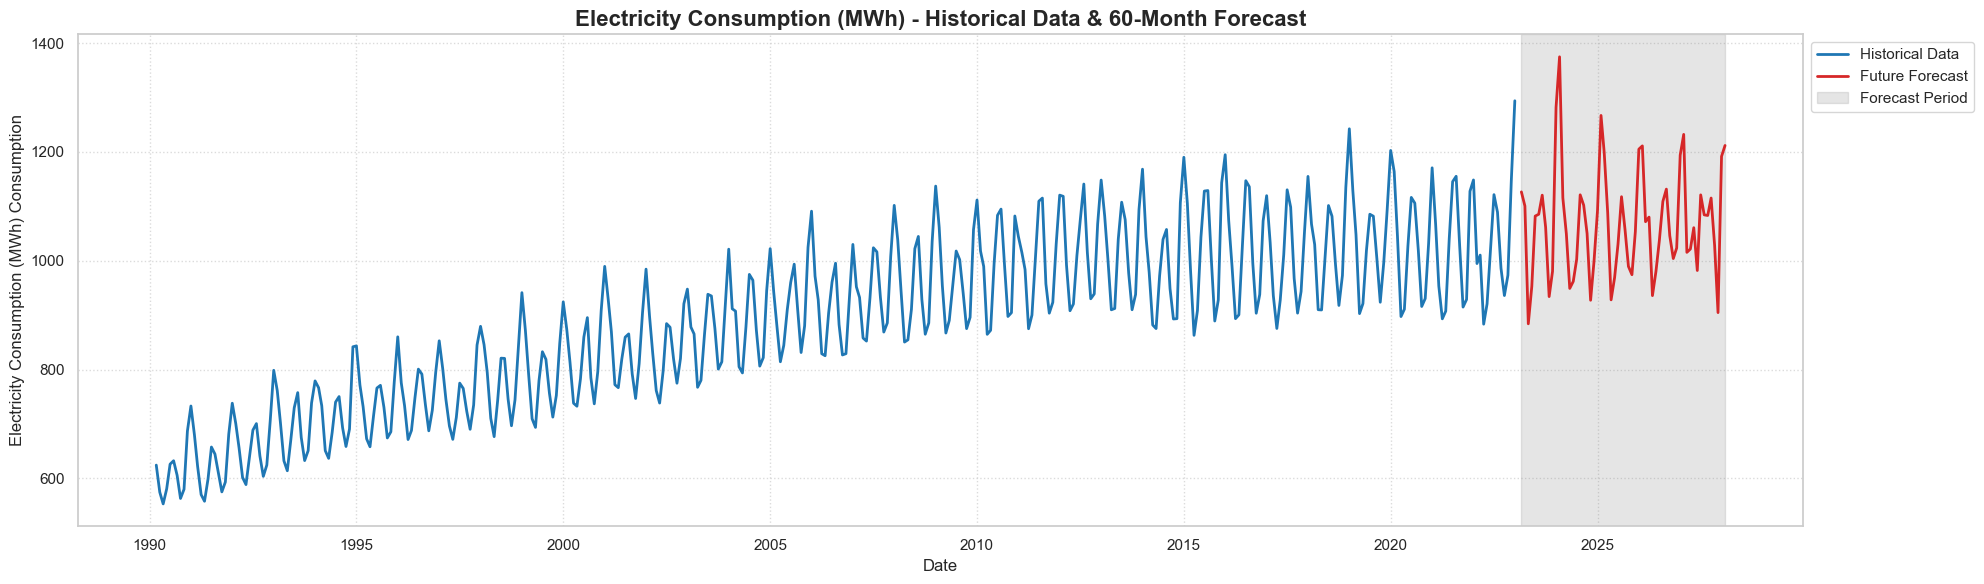

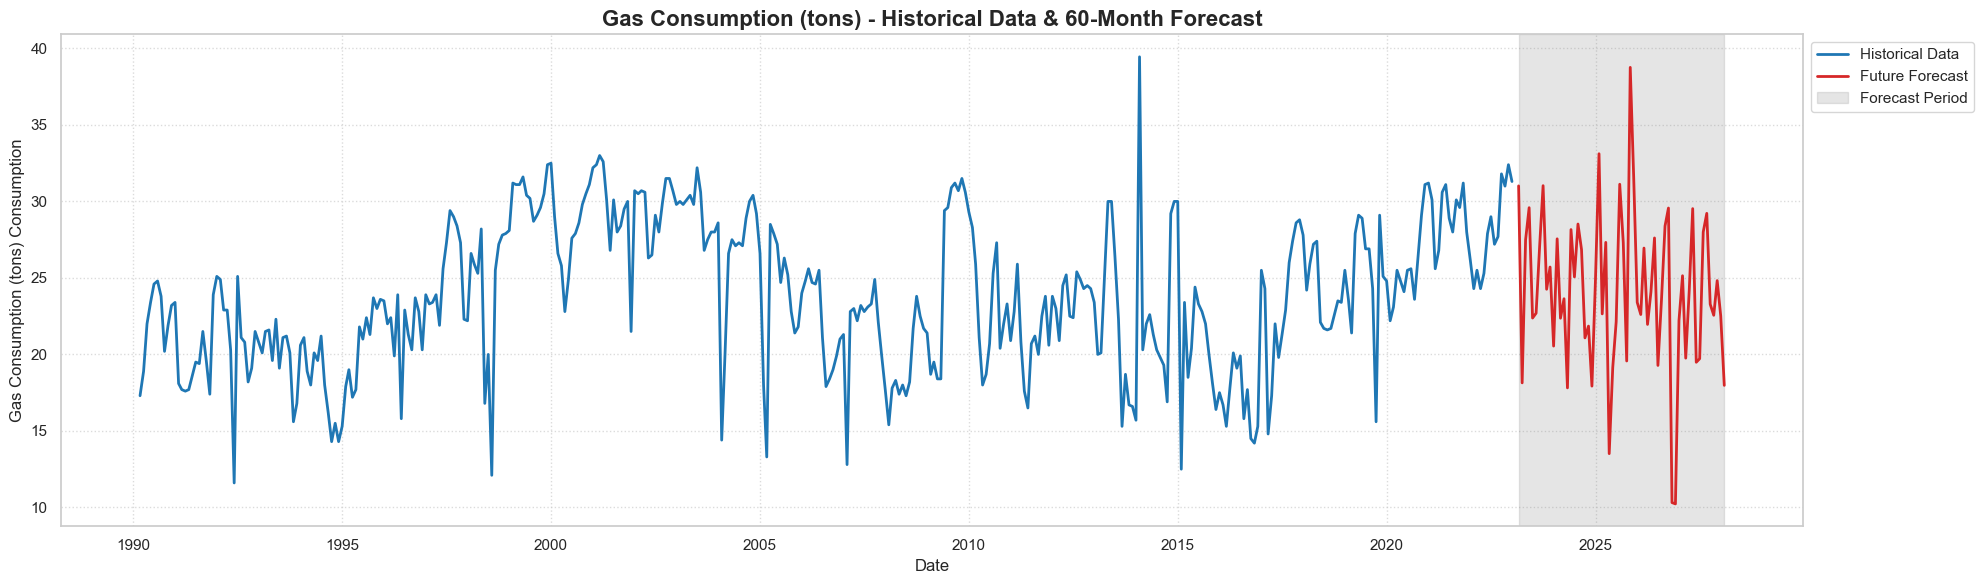

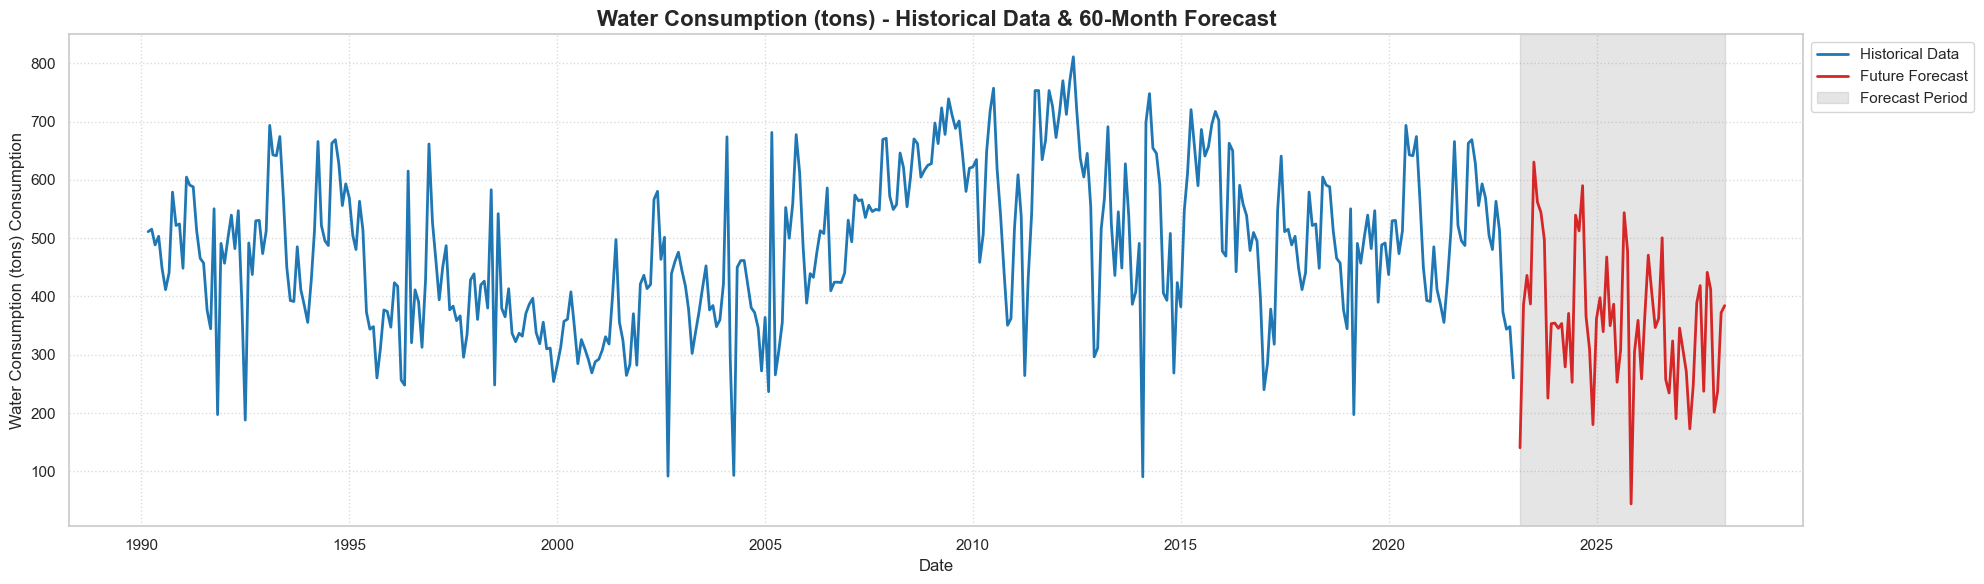

In [27]:
import matplotlib.pyplot as plt

# Function to Plot Historical Data with Future Forecasts
def plot_future_forecast(data, forecast, energy_type):
    plt.figure(figsize=(20, 6))
    
    # Plot Historical Data
    plt.plot(data.index, data.values, label='Historical Data', color='#1f77b4', linewidth=2)
    
    # Plot Future Forecast
    plt.plot(forecast.index, forecast.values, label='Future Forecast', color='#d62728', linewidth=2)

    # Highlight Forecast Period
    plt.axvspan(forecast.index[0], forecast.index[-1], color='gray', alpha=0.2, label='Forecast Period')

    # Title and Labels
    plt.title(f'{energy_type} - Historical Data & 60-Month Forecast', fontsize=16, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel(f'{energy_type} Consumption')

    # Improved Legend Placement
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot

    # Grid and Layout Adjustments
    plt.grid(linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot Forecasts for Each Energy Type with Updated Naming
for energy_type in ['Electricity Consumption (MWh)', 'Gas Consumption (tons)', 'Water Consumption (tons)']:
    plot_future_forecast(data[energy_type], forecast_df[energy_type], energy_type)


## **Forecast Observations and Conclusions**

---

<blockquote>

### 🔌 **Electricity Consumption (MWh) - 60-Month Forecast**

- **Trend:**  
  The forecast shows a **strong and steady upward trend** in electricity consumption, reflecting continued growth consistent with historical patterns. This suggests increasing demand driven by economic activities, technological advancements, and population growth.

- **Seasonality:**  
  The forecast captures **clear seasonal fluctuations**, with regular peaks and troughs that align well with historical data. This indicates strong model performance in identifying and projecting seasonal consumption trends.

- **Stability:**  
  The forecast is **consistent and reliable**, smoothly extending historical trends without abrupt changes. The model demonstrates an excellent fit, effectively balancing long-term growth with seasonal dynamics.

- **Conclusion:**  
  Electricity consumption is expected to **rise steadily** over the next 60 months, with well-defined seasonal patterns reflecting stable and predictable usage trends.
  <br>
ㅤ
</blockquote>

---

<blockquote>

### **Gas Consumption (tons) - 60-Month Forecast**

- **Trend:**  
  The forecast suggests a **stable consumption trend** with natural fluctuations that mirror historical patterns. This indicates resilience in gas demand, with potential for steady usage influenced by consistent energy needs.

- **Seasonality:**  
  The forecast reflects **noticeable seasonal variations**, capturing cyclical trends related to factors like temperature changes and seasonal industrial demands.

- **Stability:**  
  The forecast displays **realistic variability**, closely aligning with the dynamic nature of historical gas consumption. This reflects the model’s strength in adapting to complex consumption behaviors over time.

- **Conclusion:**  
  Gas consumption is expected to **remain stable with natural fluctuations**, showcasing strong seasonal patterns and consistent long-term demand.
  <br>
ㅤ
</blockquote>

---

<blockquote>

### **Water Consumption (tons) - 60-Month Forecast**

- **Trend:**  
  The forecast shows a **balanced and consistent trend**, reflecting historical consumption patterns with healthy fluctuations. This suggests stable water demand influenced by regular usage cycles.

- **Seasonality:**  
  The forecast demonstrates **distinct seasonal patterns**, effectively capturing periodic changes related to environmental factors and usage habits.

- **Stability:**  
  The forecast maintains a **realistic level of variability**, closely resembling historical data. This indicates strong model performance in capturing both steady trends and dynamic shifts.

- **Conclusion:**  
  Water consumption is expected to **remain stable with natural seasonal variations**, reflecting well-established patterns in historical data and providing confidence in future projections.
  <br>
ㅤ
</blockquote>


# **Phase 9: Final Conclusion**

---

In this project, we conducted an in-depth analysis of **Electricity**, **Gas**, and **Water Consumption** data to forecast future trends using advanced time series models. Our approach involved comprehensive data preparation, exploratory data analysis, model development, and evaluation.

### **Key Findings:**

1. **Model Performance:**
   - **Electricity Consumption (MWh):** The **SARIMAX model** effectively captured both trend and seasonality with high accuracy (**MAPE:** 0.036, **R²:** 0.79), providing reliable forecasts aligned with historical consumption patterns.
   - **Gas Consumption (tons):** The **SARIMAX model** successfully modeled the data’s inherent volatility while maintaining robust trend and seasonal detection, delivering stable and accurate forecasts (**MAPE:** 0.152, **R²:** -0.03).
   - **Water Consumption (tons):** The **HWES (Holt-Winters Exponential Smoothing) model** accurately modeled both trend and seasonal components, providing realistic forecasts that reflect natural fluctuations (**MAPE:** 0.191, **R²:** -0.13).

2. **Forecast Trends:**
   - **Electricity:** Expected to maintain a **strong upward trend** with well-defined **seasonal fluctuations**, reflecting consistent growth in demand driven by economic activities, technological advancements, and population growth.
   - **Gas:** Forecasts indicate **stable consumption** with natural variations, consistent with historical trends and influenced by seasonal heating needs, industrial usage, and efficiency measures.
   - **Water:** Displays **moderate fluctuations** with seasonal variations, providing realistic projections aligned with historical patterns and capturing natural demand shifts.

### **Model Strengths and Insights:**

> **Strengths:**
> - **High accuracy** in predicting electricity consumption, with clear trends and seasonal patterns effectively captured.
> - **Robust performance** in handling both stable and volatile data for gas consumption, demonstrating flexibility across different energy types.
> - **Realistic forecasting** for water consumption, reflecting historical variability and seasonal effects.

> **Areas for Future Enhancements:**
> - Incorporating **external variables** such as weather conditions, economic indicators, or population growth to improve forecast accuracy.
> - Exploring **advanced modeling techniques** like machine learning algorithms or hybrid models for even more precise predictions.
> - Enhancing **residual diagnostics** to further refine model performance and address any remaining autocorrelations.

---




## **Conclusion:**

This project successfully forecasted future energy consumption trends for electricity, gas, and water using advanced time series models. The models demonstrated strong performance in capturing historical patterns and projecting future trends with high accuracy.

We can confidently conclude that the applied models provide **reliable and insightful forecasts**, supporting data-driven decision-making for energy management and planning.


Our final best models of this project have the following parameters and configurations" 

### Model Configurations

| Energy Type                   | Model           | Order          | Seasonal Order           | Trend | Seasonal | Damped |
|--------------------------------|-----------------|----------------|--------------------------|-------|----------|--------|
| Electricity Consumption (MWh)  | SARIMAX         | (1, 1, 1)      | (1, 0, 0, 12)            | NaN   | NaN      | NaN    |
| Gas Consumption (tons)         | SARIMAX         | (1, 0, 1)      | (0, 1, 1, 12)            | NaN   | NaN      | NaN    |
| Water Consumption (tons)       | HWES            | NaN            | NaN                      | mul   | add      | False  |


---